<h1 style= 'text-align: center;'>NLP email Classification </h1> 

# Name:-

## *Parth Suhas Mane*

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import math
import string
#import fasttext
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
import textblob
from textblob import TextBlob
from textblob import Word
import re
import collections
# Importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')

## Importing Dataset

In [3]:
email = pd.read_csv('emails.csv')
email

Unnamed: 0                     filename  \
0               0      arnold-j/_sent_mail/34.   
1               1     arnold-j/_sent_mail/517.   
2               2     arnold-j/_sent_mail/743.   
3               3     arnold-j/_sent_mail/766.   
4               4     arnold-j/_sent_mail/797.   
...           ...                          ...   
48071       48071  campbell-l/notes_inbox/133.   
48072       48072  campbell-l/notes_inbox/134.   
48073       48073  campbell-l/notes_inbox/135.   
48074       48074  campbell-l/notes_inbox/136.   
48075       48075  campbell-l/notes_inbox/137.   

                                          Message-ID  \
0      <15267340.1075857594923.JavaMail.evans@thyme>   
1      <15539583.1075857652152.JavaMail.evans@thyme>   
2       <4339799.1075857657711.JavaMail.evans@thyme>   
3      <25574783.1075857658215.JavaMail.evans@thyme>   
4      <19506151.1075857658895.JavaMail.evans@thyme>   
...                                              ...   
48071   <6503484.1075857876489.JavaMail.evans@thyme>   
48072  <17277180.1075857876513.JavaMail.evans@thyme>   
48073  <31066400.1075857876537.JavaMail.evans@thyme>   
48074  <26024436.1075857876659.JavaMail.evans@thyme>   
48075  <10677824.1075857876692.JavaMail.evans@thyme>   

                                                                                                   content  \
0      eat shit\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@excelr\r\n11/18/2000 01:01 PM\r\nTo: John Arnold/HOU...   
1                                                                                                 fuck you   
2      Gentlemen:\r\nThe following champagne is available at 70% of approximate retail price. Also \r\n...   
3      sorry i've taken so long...just been trying to fend off the chicks.   life is \r\nsooooo hard so...   
4      asshole\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@excelr\r\n12/23/2000 10:51 AM\r\nTo: John Arnold/HOU/...   
...                                                                                                    ...   
48071  Dear Market Participants,\r\n\r\nPlease note the changes below are planned for the indicated\r\n...   
48072  According to my fancy ciphering we made $310,037.50 for the month of \r\nNovember.  This figure ...   
48073  BUSINESS HIGHLIGHTS\r\n\r\nWeather Group\r\n\r\nLet=01,s give a big round of applause to the Wea...   
48074  Welcome to: DIAMONDS NEWSLETTER         Issue: 2000-12\r\n*********SPECIAL HOLIDAY EDITION******...   
48075  ---------------------- Forwarded by Tamara Jae Black/HOU/ECT on 12/06/2000 \r\n04:45 PM --------...   

             Class  
0          Abusive  
1          Abusive  
2          Abusive  
3          Abusive  
4          Abusive  
...            ...  
48071  Non Abusive  
48072  Non Abusive  
48073  Non Abusive  
48074  Non Abusive  
48075  Non Abusive  

[48076 rows x 5 columns]

VARIABLES-

*Variable names and their descriptions are as follows*

1.   **Filename** - It is the name of file from where the content of mail is extracted.

2.   **Message-ID**- It is the ID related to the file or mail that we have extracted.
3. **Content**- It is the text in the mail with respect to particular Message-ID and Filename.
4. **Class**- It is a kind of  classification column for particular mail weather it has Abusive or Non abbusive content.

We can drop the columns that have no significance over the objective of this project. So we drop the columns named "Unnamed:0", "filename" and "Message-ID".

In [4]:
# dropping "Unnamed:0", "filename" and "Message-ID" columns
emails= email[['content','Class']]
emails

content  \
0      eat shit\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@excelr\r\n11/18/2000 01:01 PM\r\nTo: John Arnold/HOU...   
1                                                                                                 fuck you   
2      Gentlemen:\r\nThe following champagne is available at 70% of approximate retail price. Also \r\n...   
3      sorry i've taken so long...just been trying to fend off the chicks.   life is \r\nsooooo hard so...   
4      asshole\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@excelr\r\n12/23/2000 10:51 AM\r\nTo: John Arnold/HOU/...   
...                                                                                                    ...   
48071  Dear Market Participants,\r\n\r\nPlease note the changes below are planned for the indicated\r\n...   
48072  According to my fancy ciphering we made $310,037.50 for the month of \r\nNovember.  This figure ...   
48073  BUSINESS HIGHLIGHTS\r\n\r\nWeather Group\r\n\r\nLet=01,s give a big round of applause to the Wea...   
48074  Welcome to: DIAMONDS NEWSLETTER         Issue: 2000-12\r\n*********SPECIAL HOLIDAY EDITION******...   
48075  ---------------------- Forwarded by Tamara Jae Black/HOU/ECT on 12/06/2000 \r\n04:45 PM --------...   

             Class  
0          Abusive  
1          Abusive  
2          Abusive  
3          Abusive  
4          Abusive  
...            ...  
48071  Non Abusive  
48072  Non Abusive  
48073  Non Abusive  
48074  Non Abusive  
48075  Non Abusive  

[48076 rows x 2 columns]

# Exploratory Data Analysis

In [5]:
# getting information from the dataset
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  48076 non-null  object
 1   Class    48076 non-null  object
dtypes: object(2)
memory usage: 751.3+ KB



*   Our data is in form of DataFrame not as arry or list or dictionary format

*   There are totally 48076 mails or entries.


*   All the columns are object datatype and they are classified correctly as we can see from variables description they are not numerical data.

*   There are no Null entries or NaN values in our dataset.

In [6]:
# getting null values from the dataset
emails.isnull().sum()

content    0
Class      0
dtype: int64

There are no null values in the dataset

In [7]:
#Check duplicate rows in dataset
emails[emails.duplicated()]

content  \
7      sorry i've taken so long...just been trying to fend off the chicks.   life is \r\nsooooo hard so...   
8      asshole\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@excelr\r\n12/23/2000 10:51 AM\r\nTo: John Arnold/HOU/...   
9      asshole\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@excelr\r\n12/24/2000 08:45 AM\r\nTo: John Arnold/HOU/...   
10     eat shit\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@excelr\r\n11/18/2000 01:01 PM\r\nTo: John Arnold/HOU...   
11     Do you know my hr rep's name?\r\n\r\n\r\n\r\nJennifer Burns\r\n\r\n10/23/2000 04:09 PM\r\n\r\nTo...   
...                                                                                                    ...   
48071  Dear Market Participants,\r\n\r\nPlease note the changes below are planned for the indicated\r\n...   
48072  According to my fancy ciphering we made $310,037.50 for the month of \r\nNovember.  This figure ...   
48073  BUSINESS HIGHLIGHTS\r\n\r\nWeather Group\r\n\r\nLet=01,s give a big round of applause to the Wea...   
48074  Welcome to: DIAMONDS NEWSLETTER         Issue: 2000-12\r\n*********SPECIAL HOLIDAY EDITION******...   
48075  ---------------------- Forwarded by Tamara Jae Black/HOU/ECT on 12/06/2000 \r\n04:45 PM --------...   

             Class  
7          Abusive  
8          Abusive  
9          Abusive  
10         Abusive  
11         Abusive  
...            ...  
48071  Non Abusive  
48072  Non Abusive  
48073  Non Abusive  
48074  Non Abusive  
48075  Non Abusive  

[23420 rows x 2 columns]

There are 23420 Duplicate values in our Dataset.

Lets divide the Class column in two categories that is "Abusive" & "Non_Abusive".

In [8]:
# Checking number of "Abusive" & "Non_Abusive" values in the Class
emails['Class'].value_counts()

Non Abusive    44666
Abusive         3410
Name: Class, dtype: int64

So there are 44666 Non Abusive values and 3410 Abusive values.

<AxesSubplot:xlabel='Class', ylabel='count'>

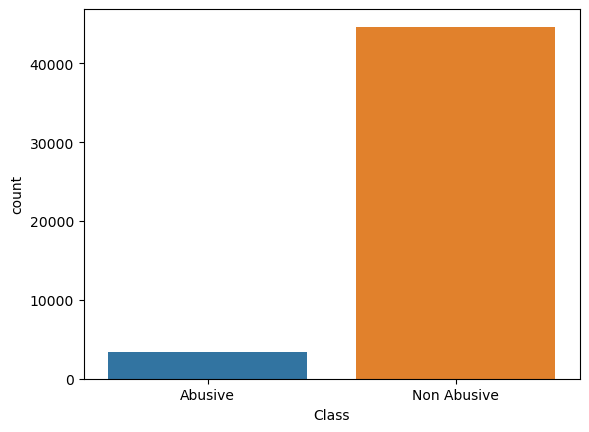

In [9]:
# Countplot for unique values in Class variable
sns.countplot(emails.Class)

Lets store them in respective variable.

In [10]:
abusive = emails[emails["Class"]=="Abusive"]
abusive.shape

(3410, 2)

In [11]:
non_abusive = emails[emails["Class"]=="Non Abusive"]
non_abusive.shape

(44666, 2)

Removing duplicate datapoints from non_abusive dataframe 
Here we are removing duplicates olny from non_abusive dataframe because given data is imbalance with less No.of abusive emails 

In [12]:
non_abusive1 = non_abusive.drop_duplicates()
non_abusive1.shape

(23014, 2)

In [13]:
print("Abusive ", len(abusive),"\n""Non Abusive ", len(non_abusive1))

Abusive  3410 
Non Abusive  23014


##  Auto EDA using sweetviz

In [14]:
# import sweetviz as sv
# sweet_report=sv.analyze(emails)
# sweet_report.show_notebook()
# sweet_report.show_html('Emails_SV_Report.html')

## Text  Pre-Processing

### 1. Expanding Contractions

In [15]:
emails['no_contract'] = emails['content'].apply(lambda x: [contractions.fix(word) for word in x.split()])

In [16]:
emails['content_str'] = [' '.join(map(str, l)) for l in emails['no_contract']]

In [17]:
emails[['content','content_str']].head()

content  \
0  eat shit\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@excelr\r\n11/18/2000 01:01 PM\r\nTo: John Arnold/HOU...   
1                                                                                             fuck you   
2  Gentlemen:\r\nThe following champagne is available at 70% of approximate retail price. Also \r\n...   
3  sorry i've taken so long...just been trying to fend off the chicks.   life is \r\nsooooo hard so...   
4  asshole\r\n\r\n\r\n\r\n\r\nJohn J Lavorato@excelr\r\n12/23/2000 10:51 AM\r\nTo: John Arnold/HOU/...   

                                                                                           content_str  
0  eat shit John J Lavorato@excelr 11/18/2000 01:01 PM To: John Arnold/HOU/ECT@ECT cc: Subject: Foo...  
1                                                                                             fuck you  
2  Gentlemen: The following champagne is available at 70% of approximate retail price. Also have in...  
3  sorry i have taken so long...just been trying to fend off the chicks. life is sooooo hard someti...  
4  asshole John J Lavorato@excelr 12/23/2000 10:51 AM To: John Arnold/HOU/ECT@ECT cc: Subject: john...

1.  Contractions are the little literary shortcuts, where we use "Should’ve" insted of "should have" , "Don't" insted of "Do Not" this contrction function expand those shortcuts. 
2.  We are going to add a new column to our dataframe called 'content_str' and apply contraction function to 'content' column which will expand any contractions
3. In the 4th row we can see "i've" is expanded to "i have". 


### 2. Removing Punctuations

In [18]:
emails['no_punc'] = emails['content_str'].str.replace('[^\w\s]','')
emails.iloc[:,2:].head()

no_contract  \
0  [eat, shit, John, J, Lavorato@excelr, 11/18/2000, 01:01, PM, To:, John, Arnold/HOU/ECT@ECT, cc:,...   
1                                                                                          [fuck, you]   
2  [Gentlemen:, The, following, champagne, is, available, at, 70%, of, approximate, retail, price.,...   
3  [sorry, i have, taken, so, long...just, been, trying, to, fend, off, the, chicks., life, is, soo...   
4  [asshole, John, J, Lavorato@excelr, 12/23/2000, 10:51, AM, To:, John, Arnold/HOU/ECT@ECT, cc:, S...   

                                                                                           content_str  \
0  eat shit John J Lavorato@excelr 11/18/2000 01:01 PM To: John Arnold/HOU/ECT@ECT cc: Subject: Foo...   
1                                                                                             fuck you   
2  Gentlemen: The following champagne is available at 70% of approximate retail price. Also have in...   
3  sorry i have taken so long...just been trying to fend off the chicks. life is sooooo hard someti...   
4  asshole John J Lavorato@excelr 12/23/2000 10:51 AM To: John Arnold/HOU/ECT@ECT cc: Subject: john...   

                                                                                               no_punc  
0  eat shit John J Lavoratoexcelr 11182000 0101 PM To John ArnoldHOUECTECT cc Subject Football bets...  
1                                                                                             fuck you  
2  Gentlemen The following champagne is available at 70 of approximate retail price Also have inter...  
3  sorry i have taken so longjust been trying to fend off the chicks life is sooooo hard sometimes ...  
4  asshole John J Lavoratoexcelr 12232000 1051 AM To John ArnoldHOUECTECT cc Subject john I cannot ...

### 3. Tokenization

In [19]:
# Tokenization of the string i.e divding the string into separate words
emails['tokenized'] = emails['no_punc'].apply(word_tokenize)
emails.iloc[:,2:].head()

no_contract  \
0  [eat, shit, John, J, Lavorato@excelr, 11/18/2000, 01:01, PM, To:, John, Arnold/HOU/ECT@ECT, cc:,...   
1                                                                                          [fuck, you]   
2  [Gentlemen:, The, following, champagne, is, available, at, 70%, of, approximate, retail, price.,...   
3  [sorry, i have, taken, so, long...just, been, trying, to, fend, off, the, chicks., life, is, soo...   
4  [asshole, John, J, Lavorato@excelr, 12/23/2000, 10:51, AM, To:, John, Arnold/HOU/ECT@ECT, cc:, S...   

                                                                                           content_str  \
0  eat shit John J Lavorato@excelr 11/18/2000 01:01 PM To: John Arnold/HOU/ECT@ECT cc: Subject: Foo...   
1                                                                                             fuck you   
2  Gentlemen: The following champagne is available at 70% of approximate retail price. Also have in...   
3  sorry i have taken so long...just been trying to fend off the chicks. life is sooooo hard someti...   
4  asshole John J Lavorato@excelr 12/23/2000 10:51 AM To: John Arnold/HOU/ECT@ECT cc: Subject: john...   

                                                                                               no_punc  \
0  eat shit John J Lavoratoexcelr 11182000 0101 PM To John ArnoldHOUECTECT cc Subject Football bets...   
1                                                                                             fuck you   
2  Gentlemen The following champagne is available at 70 of approximate retail price Also have inter...   
3  sorry i have taken so longjust been trying to fend off the chicks life is sooooo hard sometimes ...   
4  asshole John J Lavoratoexcelr 12232000 1051 AM To John ArnoldHOUECTECT cc Subject john I cannot ...   

                                                                                             tokenized  
0  [eat, shit, John, J, Lavoratoexcelr, 11182000, 0101, PM, To, John, ArnoldHOUECTECT, cc, Subject,...  
1                                                                                          [fuck, you]  
2  [Gentlemen, The, following, champagne, is, available, at, 70, of, approximate, retail, price, Al...  
3  [sorry, i, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo...  
4  [asshole, John, J, Lavoratoexcelr, 12232000, 1051, AM, To, John, ArnoldHOUECTECT, cc, Subject, j...

### 4. Converting all Characters to Lowercase

In [20]:
# Converting Uppercase letters to Lowercase
emails['lower'] = emails['tokenized'].apply(lambda x: [word.lower() for word in x])
emails.iloc[:,2:].head()

no_contract  \
0  [eat, shit, John, J, Lavorato@excelr, 11/18/2000, 01:01, PM, To:, John, Arnold/HOU/ECT@ECT, cc:,...   
1                                                                                          [fuck, you]   
2  [Gentlemen:, The, following, champagne, is, available, at, 70%, of, approximate, retail, price.,...   
3  [sorry, i have, taken, so, long...just, been, trying, to, fend, off, the, chicks., life, is, soo...   
4  [asshole, John, J, Lavorato@excelr, 12/23/2000, 10:51, AM, To:, John, Arnold/HOU/ECT@ECT, cc:, S...   

                                                                                           content_str  \
0  eat shit John J Lavorato@excelr 11/18/2000 01:01 PM To: John Arnold/HOU/ECT@ECT cc: Subject: Foo...   
1                                                                                             fuck you   
2  Gentlemen: The following champagne is available at 70% of approximate retail price. Also have in...   
3  sorry i have taken so long...just been trying to fend off the chicks. life is sooooo hard someti...   
4  asshole John J Lavorato@excelr 12/23/2000 10:51 AM To: John Arnold/HOU/ECT@ECT cc: Subject: john...   

                                                                                               no_punc  \
0  eat shit John J Lavoratoexcelr 11182000 0101 PM To John ArnoldHOUECTECT cc Subject Football bets...   
1                                                                                             fuck you   
2  Gentlemen The following champagne is available at 70 of approximate retail price Also have inter...   
3  sorry i have taken so longjust been trying to fend off the chicks life is sooooo hard sometimes ...   
4  asshole John J Lavoratoexcelr 12232000 1051 AM To John ArnoldHOUECTECT cc Subject john I cannot ...   

                                                                                             tokenized  \
0  [eat, shit, John, J, Lavoratoexcelr, 11182000, 0101, PM, To, John, ArnoldHOUECTECT, cc, Subject,...   
1                                                                                          [fuck, you]   
2  [Gentlemen, The, following, champagne, is, available, at, 70, of, approximate, retail, price, Al...   
3  [sorry, i, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo...   
4  [asshole, John, J, Lavoratoexcelr, 12232000, 1051, AM, To, John, ArnoldHOUECTECT, cc, Subject, j...   

                                                                                                 lower  
0  [eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, to, john, arnoldhouectect, cc, subject,...  
1                                                                                          [fuck, you]  
2  [gentlemen, the, following, champagne, is, available, at, 70, of, approximate, retail, price, al...  
3  [sorry, i, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo...  
4  [asshole, john, j, lavoratoexcelr, 12232000, 1051, am, to, john, arnoldhouectect, cc, subject, j...

### 5. Number of stopwords

#### Stop words are a set of commonly used words in a language.

In [21]:
# Adding a column "stopwords" which shows the count of stopwords in the text.
stop = stopwords.words('english')
emails['stopwords'] = emails['content_str'].apply(lambda x: len([x for x in x.split() if x in stop]))
emails.iloc[:,4:].head()

no_punc  \
0  eat shit John J Lavoratoexcelr 11182000 0101 PM To John ArnoldHOUECTECT cc Subject Football bets...   
1                                                                                             fuck you   
2  Gentlemen The following champagne is available at 70 of approximate retail price Also have inter...   
3  sorry i have taken so longjust been trying to fend off the chicks life is sooooo hard sometimes ...   
4  asshole John J Lavoratoexcelr 12232000 1051 AM To John ArnoldHOUECTECT cc Subject john I cannot ...   

                                                                                             tokenized  \
0  [eat, shit, John, J, Lavoratoexcelr, 11182000, 0101, PM, To, John, ArnoldHOUECTECT, cc, Subject,...   
1                                                                                          [fuck, you]   
2  [Gentlemen, The, following, champagne, is, available, at, 70, of, approximate, retail, price, Al...   
3  [sorry, i, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo...   
4  [asshole, John, J, Lavoratoexcelr, 12232000, 1051, AM, To, John, ArnoldHOUECTECT, cc, Subject, j...   

                                                                                                 lower  \
0  [eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, to, john, arnoldhouectect, cc, subject,...   
1                                                                                          [fuck, you]   
2  [gentlemen, the, following, champagne, is, available, at, 70, of, approximate, retail, price, al...   
3  [sorry, i, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo...   
4  [asshole, john, j, lavoratoexcelr, 12232000, 1051, am, to, john, arnoldhouectect, cc, subject, j...   

   stopwords  
0          1  
1          1  
2         11  
3         25  
4          2

### 6. Removing Stopwords

In [22]:
stop_words = set(stopwords.words('english'))
emails['stopwords_removed'] = emails['lower'].apply(lambda x: [word for word in x if word not in stop_words])
emails.iloc[:,4:].head()

no_punc  \
0  eat shit John J Lavoratoexcelr 11182000 0101 PM To John ArnoldHOUECTECT cc Subject Football bets...   
1                                                                                             fuck you   
2  Gentlemen The following champagne is available at 70 of approximate retail price Also have inter...   
3  sorry i have taken so longjust been trying to fend off the chicks life is sooooo hard sometimes ...   
4  asshole John J Lavoratoexcelr 12232000 1051 AM To John ArnoldHOUECTECT cc Subject john I cannot ...   

                                                                                             tokenized  \
0  [eat, shit, John, J, Lavoratoexcelr, 11182000, 0101, PM, To, John, ArnoldHOUECTECT, cc, Subject,...   
1                                                                                          [fuck, you]   
2  [Gentlemen, The, following, champagne, is, available, at, 70, of, approximate, retail, price, Al...   
3  [sorry, i, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo...   
4  [asshole, John, J, Lavoratoexcelr, 12232000, 1051, AM, To, John, ArnoldHOUECTECT, cc, Subject, j...   

                                                                                                 lower  \
0  [eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, to, john, arnoldhouectect, cc, subject,...   
1                                                                                          [fuck, you]   
2  [gentlemen, the, following, champagne, is, available, at, 70, of, approximate, retail, price, al...   
3  [sorry, i, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo...   
4  [asshole, john, j, lavoratoexcelr, 12232000, 1051, am, to, john, arnoldhouectect, cc, subject, j...   

   stopwords  \
0          1   
1          1   
2         11   
3         25   
4          2   

                                                                                     stopwords_removed  
0  [eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, john, arnoldhouectect, cc, subject, foo...  
1                                                                                               [fuck]  
2  [gentlemen, following, champagne, available, 70, approximate, retail, price, also, interest, tra...  
3  [sorry, taken, longjust, trying, fend, chicks, life, sooooo, hard, sometimes, monkey, brian, oro...  
4  [asshole, john, j, lavoratoexcelr, 12232000, 1051, john, arnoldhouectect, cc, subject, john, see...

### 7. Number of Characters

In [23]:
#Number of characters in single email 
emails['char_count'] = emails['no_punc'].str.len() 
emails.iloc[:,4:].head()

no_punc  \
0  eat shit John J Lavoratoexcelr 11182000 0101 PM To John ArnoldHOUECTECT cc Subject Football bets...   
1                                                                                             fuck you   
2  Gentlemen The following champagne is available at 70 of approximate retail price Also have inter...   
3  sorry i have taken so longjust been trying to fend off the chicks life is sooooo hard sometimes ...   
4  asshole John J Lavoratoexcelr 12232000 1051 AM To John ArnoldHOUECTECT cc Subject john I cannot ...   

                                                                                             tokenized  \
0  [eat, shit, John, J, Lavoratoexcelr, 11182000, 0101, PM, To, John, ArnoldHOUECTECT, cc, Subject,...   
1                                                                                          [fuck, you]   
2  [Gentlemen, The, following, champagne, is, available, at, 70, of, approximate, retail, price, Al...   
3  [sorry, i, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo...   
4  [asshole, John, J, Lavoratoexcelr, 12232000, 1051, AM, To, John, ArnoldHOUECTECT, cc, Subject, j...   

                                                                                                 lower  \
0  [eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, to, john, arnoldhouectect, cc, subject,...   
1                                                                                          [fuck, you]   
2  [gentlemen, the, following, champagne, is, available, at, 70, of, approximate, retail, price, al...   
3  [sorry, i, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo...   
4  [asshole, john, j, lavoratoexcelr, 12232000, 1051, am, to, john, arnoldhouectect, cc, subject, j...   

   stopwords  \
0          1   
1          1   
2         11   
3         25   
4          2   

                                                                                     stopwords_removed  \
0  [eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, john, arnoldhouectect, cc, subject, foo...   
1                                                                                               [fuck]   
2  [gentlemen, following, champagne, available, 70, approximate, retail, price, also, interest, tra...   
3  [sorry, taken, longjust, trying, fend, chicks, life, sooooo, hard, sometimes, monkey, brian, oro...   
4  [asshole, john, j, lavoratoexcelr, 12232000, 1051, john, arnoldhouectect, cc, subject, john, see...   

   char_count  
0         182  
1           8  
2         545  
3         387  
4         175

### 8. Number of words

In [24]:
#Number of Words in single email
emails['word_count'] = emails['stopwords_removed'].apply(lambda x: len(str(x).split(" ")))
emails.iloc[:,4:].head()

no_punc  \
0  eat shit John J Lavoratoexcelr 11182000 0101 PM To John ArnoldHOUECTECT cc Subject Football bets...   
1                                                                                             fuck you   
2  Gentlemen The following champagne is available at 70 of approximate retail price Also have inter...   
3  sorry i have taken so longjust been trying to fend off the chicks life is sooooo hard sometimes ...   
4  asshole John J Lavoratoexcelr 12232000 1051 AM To John ArnoldHOUECTECT cc Subject john I cannot ...   

                                                                                             tokenized  \
0  [eat, shit, John, J, Lavoratoexcelr, 11182000, 0101, PM, To, John, ArnoldHOUECTECT, cc, Subject,...   
1                                                                                          [fuck, you]   
2  [Gentlemen, The, following, champagne, is, available, at, 70, of, approximate, retail, price, Al...   
3  [sorry, i, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo...   
4  [asshole, John, J, Lavoratoexcelr, 12232000, 1051, AM, To, John, ArnoldHOUECTECT, cc, Subject, j...   

                                                                                                 lower  \
0  [eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, to, john, arnoldhouectect, cc, subject,...   
1                                                                                          [fuck, you]   
2  [gentlemen, the, following, champagne, is, available, at, 70, of, approximate, retail, price, al...   
3  [sorry, i, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo...   
4  [asshole, john, j, lavoratoexcelr, 12232000, 1051, am, to, john, arnoldhouectect, cc, subject, j...   

   stopwords  \
0          1   
1          1   
2         11   
3         25   
4          2   

                                                                                     stopwords_removed  \
0  [eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, john, arnoldhouectect, cc, subject, foo...   
1                                                                                               [fuck]   
2  [gentlemen, following, champagne, available, 70, approximate, retail, price, also, interest, tra...   
3  [sorry, taken, longjust, trying, fend, chicks, life, sooooo, hard, sometimes, monkey, brian, oro...   
4  [asshole, john, j, lavoratoexcelr, 12232000, 1051, john, arnoldhouectect, cc, subject, john, see...   

   char_count  word_count  
0         182          35  
1           8           1  
2         545          77  
3         387          39  
4         175          27

### 9. Stemming

#### The idea of stemming is to reduce different forms of word usage into its root word.
#### For example, “drive”, “drove”, “driving”, “driven”, “driver” are derivatives of the word “drive”.so stemming function converts the words to their rootwords

In [25]:
emails['stp_rem_str'] = [' '.join(map(str, l)) for l in emails['stopwords_removed']]

In [26]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
emails['stemmi']=emails['stp_rem_str'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [27]:
emails.iloc[:,4:].head()

no_punc  \
0  eat shit John J Lavoratoexcelr 11182000 0101 PM To John ArnoldHOUECTECT cc Subject Football bets...   
1                                                                                             fuck you   
2  Gentlemen The following champagne is available at 70 of approximate retail price Also have inter...   
3  sorry i have taken so longjust been trying to fend off the chicks life is sooooo hard sometimes ...   
4  asshole John J Lavoratoexcelr 12232000 1051 AM To John ArnoldHOUECTECT cc Subject john I cannot ...   

                                                                                             tokenized  \
0  [eat, shit, John, J, Lavoratoexcelr, 11182000, 0101, PM, To, John, ArnoldHOUECTECT, cc, Subject,...   
1                                                                                          [fuck, you]   
2  [Gentlemen, The, following, champagne, is, available, at, 70, of, approximate, retail, price, Al...   
3  [sorry, i, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo...   
4  [asshole, John, J, Lavoratoexcelr, 12232000, 1051, AM, To, John, ArnoldHOUECTECT, cc, Subject, j...   

                                                                                                 lower  \
0  [eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, to, john, arnoldhouectect, cc, subject,...   
1                                                                                          [fuck, you]   
2  [gentlemen, the, following, champagne, is, available, at, 70, of, approximate, retail, price, al...   
3  [sorry, i, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo...   
4  [asshole, john, j, lavoratoexcelr, 12232000, 1051, am, to, john, arnoldhouectect, cc, subject, j...   

   stopwords  \
0          1   
1          1   
2         11   
3         25   
4          2   

                                                                                     stopwords_removed  \
0  [eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, john, arnoldhouectect, cc, subject, foo...   
1                                                                                               [fuck]   
2  [gentlemen, following, champagne, available, 70, approximate, retail, price, also, interest, tra...   
3  [sorry, taken, longjust, trying, fend, chicks, life, sooooo, hard, sometimes, monkey, brian, oro...   
4  [asshole, john, j, lavoratoexcelr, 12232000, 1051, john, arnoldhouectect, cc, subject, john, see...   

   char_count  word_count  \
0         182          35   
1           8           1   
2         545          77   
3         387          39   
4         175          27   

                                                                                           stp_rem_str  \
0  eat shit john j lavoratoexcelr 11182000 0101 pm john arnoldhouectect cc subject football bets 20...   
1                                                                                                 fuck   
2  gentlemen following champagne available 70 approximate retail price also interest trading red wi...   
3  sorry taken longjust trying fend chicks life sooooo hard sometimes monkey brian orourkeexcelr co...   
4  asshole john j lavoratoexcelr 12232000 1051 john arnoldhouectect cc subject john seem make gambl...   

                                                                                                stemmi  
0  eat shit john j lavoratoexcelr 11182000 0101 pm john arnoldhouectect cc subject footbal bet 200 ...  
1                                                                                                 fuck  
2  gentlemen follow champagn avail 70 approxim retail price also interest trade red wine retail pri...  
3  sorri taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr commun 0...  
4  asshol john j lavoratoexcelr 12232000 1051 john arnoldhouectect cc subject john seem make gambl ...

### 10. Lemmatization

#### Lemmatization is a similar method as stemming but by lemmatization proces we will find the morphological rootwords.

In [28]:
emails['lemma'] = emails['stemmi'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [29]:
emails[['stemmi','lemma']].head()

stemmi  \
0  eat shit john j lavoratoexcelr 11182000 0101 pm john arnoldhouectect cc subject footbal bet 200 ...   
1                                                                                                 fuck   
2  gentlemen follow champagn avail 70 approxim retail price also interest trade red wine retail pri...   
3  sorri taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr commun 0...   
4  asshol john j lavoratoexcelr 12232000 1051 john arnoldhouectect cc subject john seem make gambl ...   

                                                                                                 lemma  
0  eat shit john j lavoratoexcelr 11182000 0101 pm john arnoldhouectect cc subject footbal bet 200 ...  
1                                                                                                 fuck  
2  gentleman follow champagn avail 70 approxim retail price also interest trade red wine retail pri...  
3  sorri taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr commun 0...  
4  asshol john j lavoratoexcelr 12232000 1051 john arnoldhouectect cc subject john seem make gambl ...

### 11. Removing Numbers

In [30]:
# Removing numbers form text
emails['cleaned']=emails['lemma'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [31]:
emails.iloc[:,-2:].head()

lemma  \
0  eat shit john j lavoratoexcelr 11182000 0101 pm john arnoldhouectect cc subject footbal bet 200 ...   
1                                                                                                 fuck   
2  gentleman follow champagn avail 70 approxim retail price also interest trade red wine retail pri...   
3  sorri taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr commun 0...   
4  asshol john j lavoratoexcelr 12232000 1051 john arnoldhouectect cc subject john seem make gambl ...   

                                                                                               cleaned  
0  eat shit john j lavoratoexcelr   pm john arnoldhouectect cc subject footbal bet  minn  buff  phi...  
1                                                                                                 fuck  
2  gentleman follow champagn avail  approxim retail price also interest trade red wine retail price...  
3  sorri taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr commun  ...  
4  asshol john j lavoratoexcelr   john arnoldhouectect cc subject john seem make gambl problem go a...

# Sentiment Analysis

#### Assining a polarity value for the text which ranges for -1 to 1 which describes the negativity and positiviy of the text.
#### Adding a column 'polarity_value' which shows the polarity value.

In [32]:
emails['polarity_value'] = emails['lemma'].apply(lambda x: TextBlob(x).sentiment.polarity )

In [33]:
emails[['content','Class','polarity_value']].sample(5)

content  \
13498  thanks\r\n\r\n\r\nTo: Eric Bass/HOU/ECT@ECT\r\ncc:  \r\nSubject: Re: FYI  \r\n\r\ni left a messa...   
5548   David,\r\n\r\nThis note is to give you my feedback on Jeanie Slone.  \r\n\r\nShe has been extrem...   
43032                                           Looks good to me. Rick Buy (Please pass along to John S. )   
9015   Family Tree Maker Plus, Including Your Special Gift - just $49.99\r\n  * Family Tree Maker 9 - t...   
47353  ______________________________________\r\n\r\nJ.Crew\r\n______________________________________\r...   

             Class  polarity_value  
13498  Non Abusive   -8.333333e-02  
5548   Non Abusive    3.700743e-17  
43032  Non Abusive    7.000000e-01  
9015   Non Abusive    2.226258e-01  
47353  Non Abusive    0.000000e+00

# Data Visualization

### Histogram of Sentiment polarity range

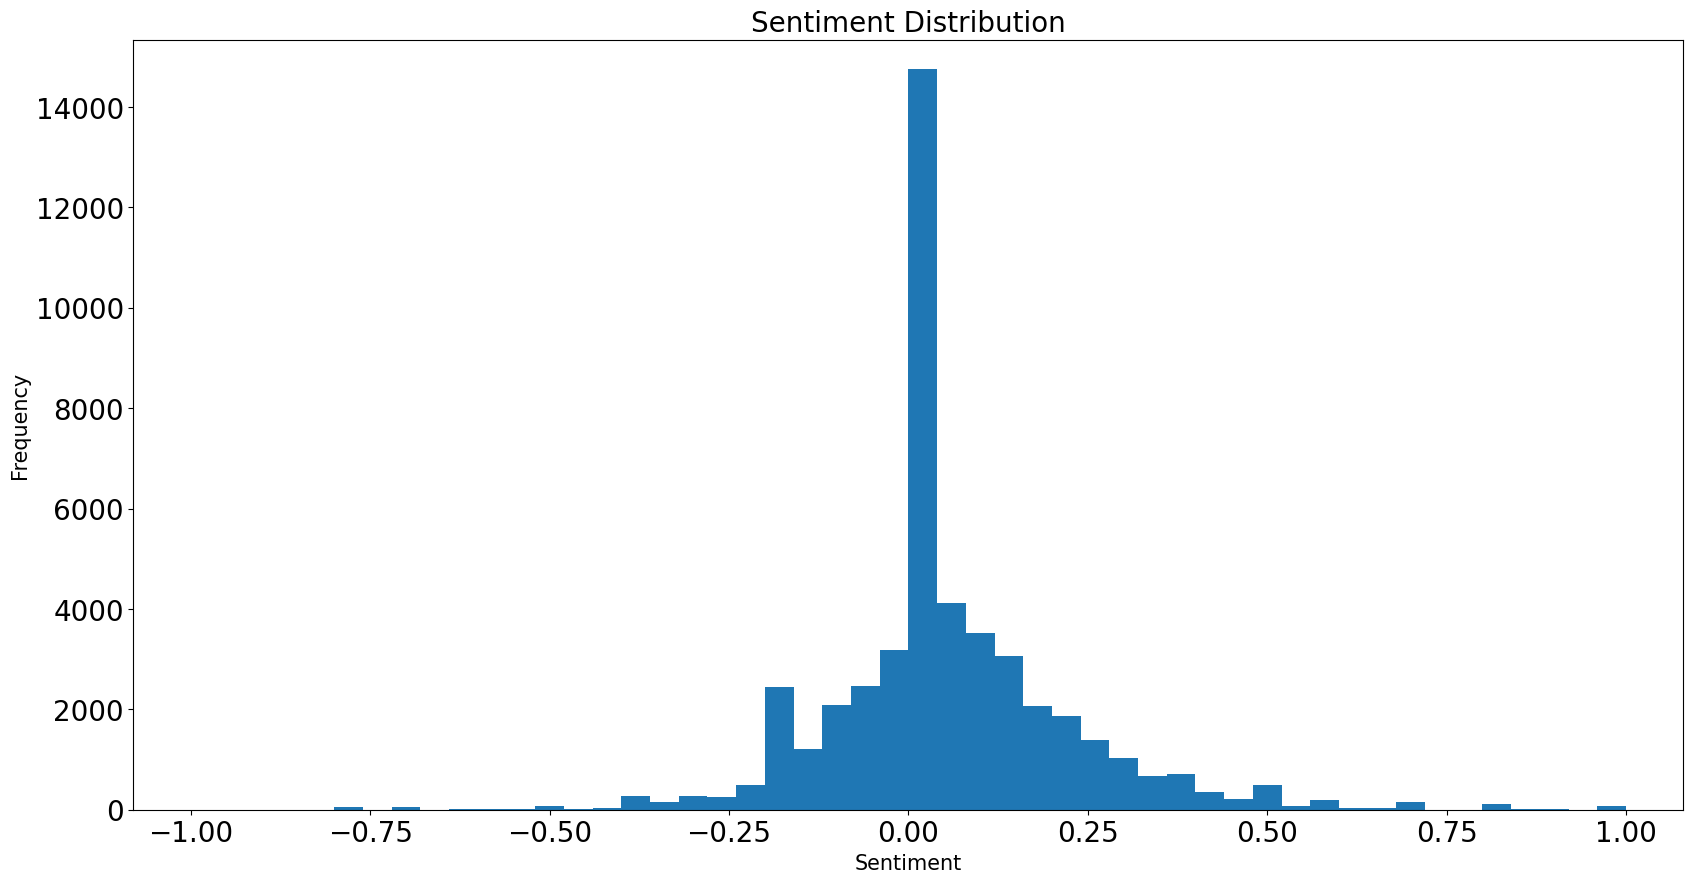

In [34]:
plt.figure(figsize=(20,10))
plt.margins(0.04)
plt.xlabel('Sentiment', fontsize=15)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=20)
plt.hist(emails['polarity_value'], bins=50)
plt.title('Sentiment Distribution', fontsize=20)
plt.show()

The above histogram is skewed to towards posivtive polarity as we know there are more Non abusive mails than abusive mails
in our data.

In [35]:
abu=emails.loc[emails['Class'] == 'Abusive']
nabu=emails.loc[emails['Class']=='Non Abusive']

Text(0, 0.5, 'No.of emails')

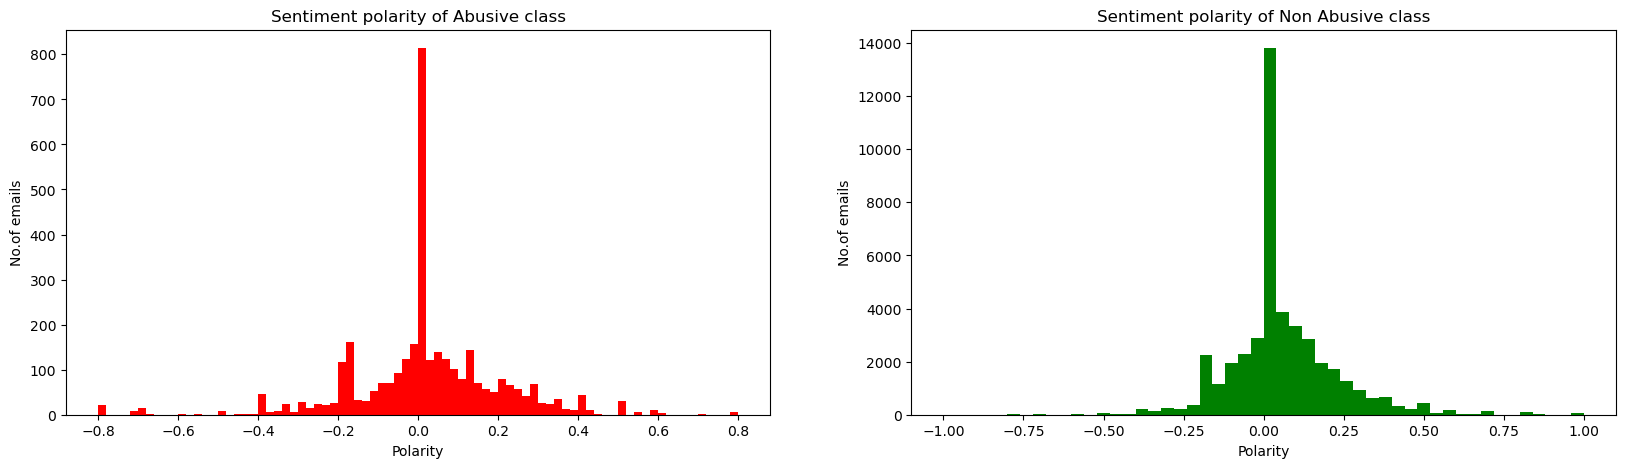

In [36]:
# Histogram for Sentiment polarity range for Abusive and Non Abusive emails.
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(abu['polarity_value'], bins=80,color='r',);
plt.title('Sentiment polarity of Abusive class')
plt.xlabel('Polarity')
plt.ylabel('No.of emails')
plt.subplot(1,2,2)
plt.hist(nabu['polarity_value'], bins=50,color='g');
plt.title('Sentiment polarity of Non Abusive class')
plt.xlabel('Polarity')
plt.ylabel('No.of emails')

### Pie Chart on Class

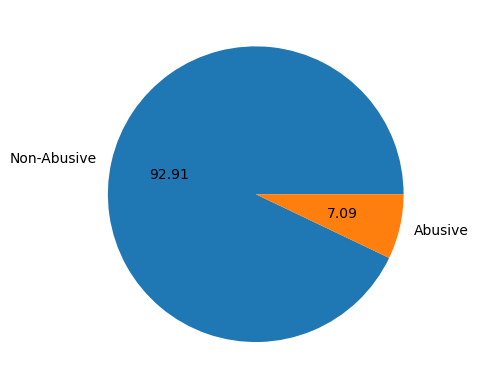

In [37]:
plt.pie(emails['Class'].value_counts(), labels=['Non-Abusive','Abusive'], autopct="%0.2f")
plt.show()

### Wordcloud

Wordcolud for top 100 most used words in the emails . The size of the words is directly propotional to the uasage of words.

In [38]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [39]:
# Joining the list into one string/text
text = ' '.join(emails['stp_rem_str'])

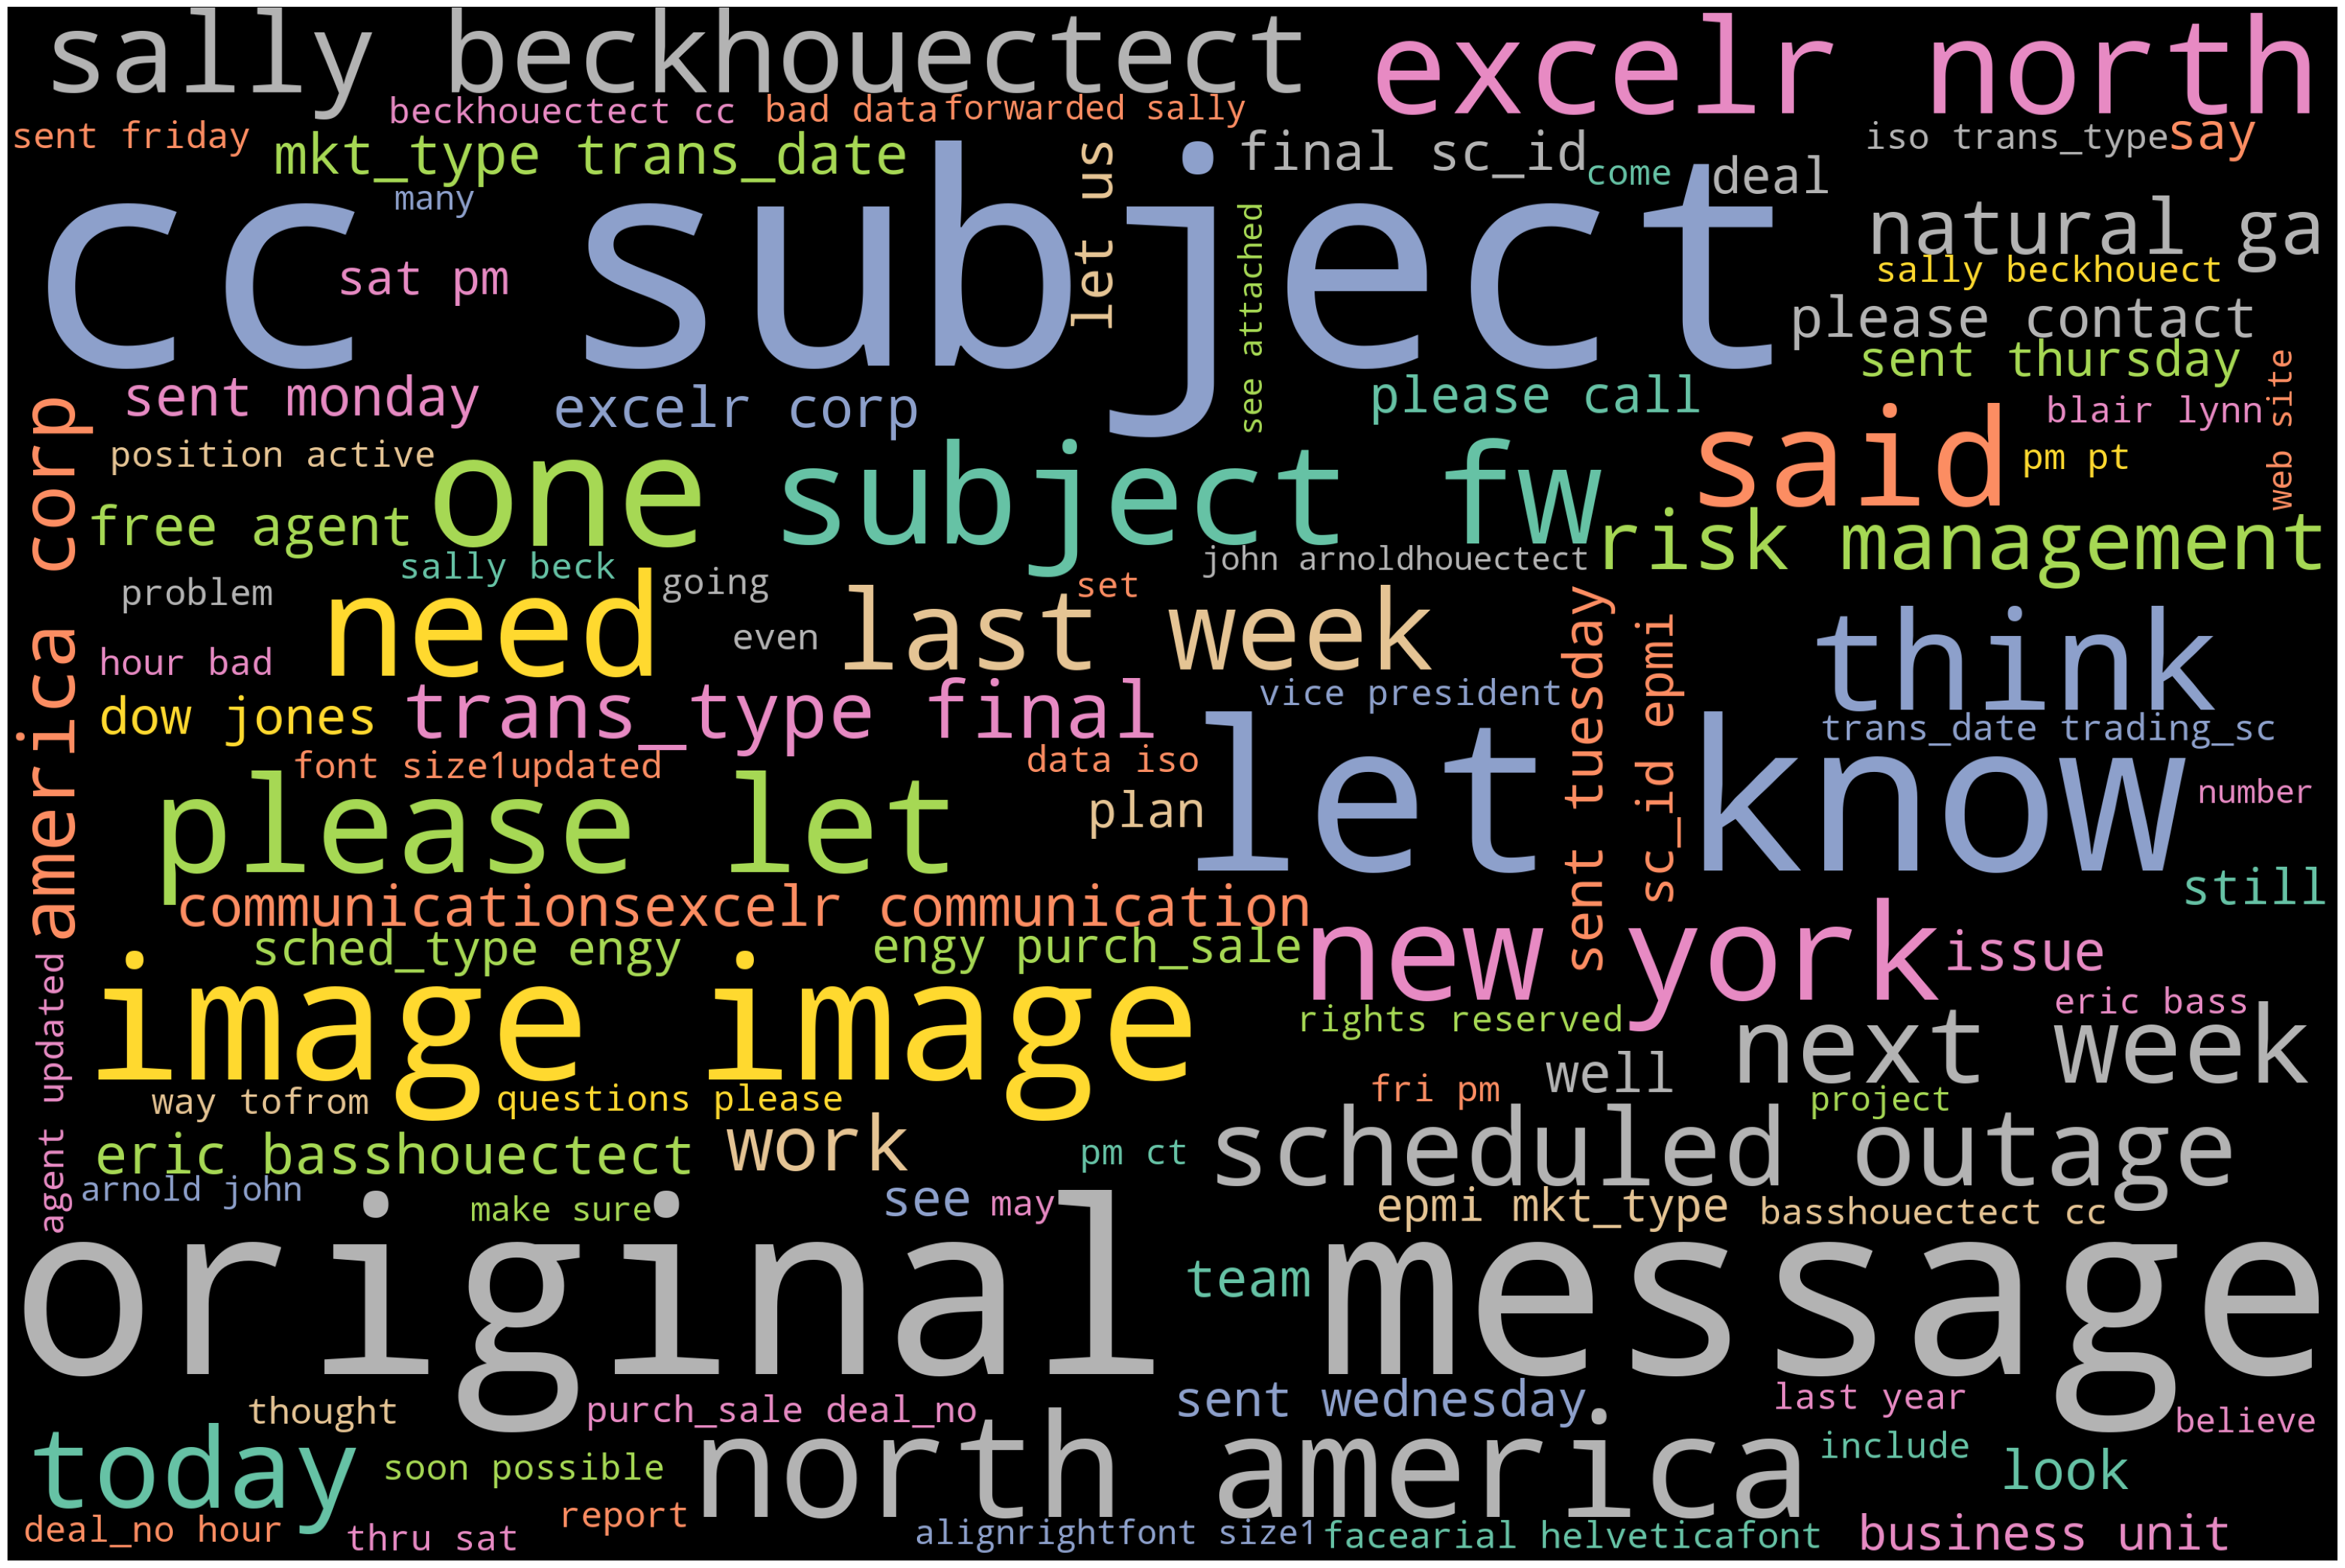

In [40]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

### Bargraph of Top 25 most used words in emails

In [41]:
email=np.array(abu['cleaned'])
s=str(email)
nabu_toc = word_tokenize(s)
print(nabu_toc)

['[', "'eat", 'shit', 'john', 'j', 'lavoratoexcelr', 'pm', 'john', 'arnoldhouectect', 'cc', 'subject', 'footbal', 'bet', 'minn', 'buff', 'phil', 'indi', 'cinnci', 'det', 'clev', 'den', 'dall', 'jack', "'", "'fuck'", "'gentleman", 'follow', 'champagn', 'avail', 'approxim', 'retail', 'price', 'also', 'interest', 'trade', 'red', 'wine', 'retail', 'price', 'deriv', 'spec', 'websit', 'winesearcercom', 'wine', 'store', 'temperatur', 'control', 'privat', 'wine', 'storag', 'facil', 'quan', 'vintag', 'wine', 'retail', 'perrier', 'jouet', 'brut', 'fleur', 'de', 'champagn', 'piper', 'heidsek', 'reserv', 'dom', 'perignon', 'veuv', 'cliquot', 'ponsardin', 'la', 'grand', 'dame', 'taitteng', 'millesin', 'brut', 'jacquart', 'millesin', 'roeder', 'cristal', "interest'", '...', "'got", 'late', 'friday', 'ever', 'heard', 'origin', 'messag', 'jeff', 'lawson', 'mailtojeffreyskillingyahoocom', 'sent', 'wednesday', 'novemb', 'pm', 'zipper', 'andi', 'subject', 'fuck', 'piec', 'shit', 'wait', 'see', 'go', 'shi

In [42]:
email_ab=np.array(abu['cleaned'])
s=str(email_ab)
abu_toc = word_tokenize(s)
print(abu_toc)

['[', "'eat", 'shit', 'john', 'j', 'lavoratoexcelr', 'pm', 'john', 'arnoldhouectect', 'cc', 'subject', 'footbal', 'bet', 'minn', 'buff', 'phil', 'indi', 'cinnci', 'det', 'clev', 'den', 'dall', 'jack', "'", "'fuck'", "'gentleman", 'follow', 'champagn', 'avail', 'approxim', 'retail', 'price', 'also', 'interest', 'trade', 'red', 'wine', 'retail', 'price', 'deriv', 'spec', 'websit', 'winesearcercom', 'wine', 'store', 'temperatur', 'control', 'privat', 'wine', 'storag', 'facil', 'quan', 'vintag', 'wine', 'retail', 'perrier', 'jouet', 'brut', 'fleur', 'de', 'champagn', 'piper', 'heidsek', 'reserv', 'dom', 'perignon', 'veuv', 'cliquot', 'ponsardin', 'la', 'grand', 'dame', 'taitteng', 'millesin', 'brut', 'jacquart', 'millesin', 'roeder', 'cristal', "interest'", '...', "'got", 'late', 'friday', 'ever', 'heard', 'origin', 'messag', 'jeff', 'lawson', 'mailtojeffreyskillingyahoocom', 'sent', 'wednesday', 'novemb', 'pm', 'zipper', 'andi', 'subject', 'fuck', 'piec', 'shit', 'wait', 'see', 'go', 'shi

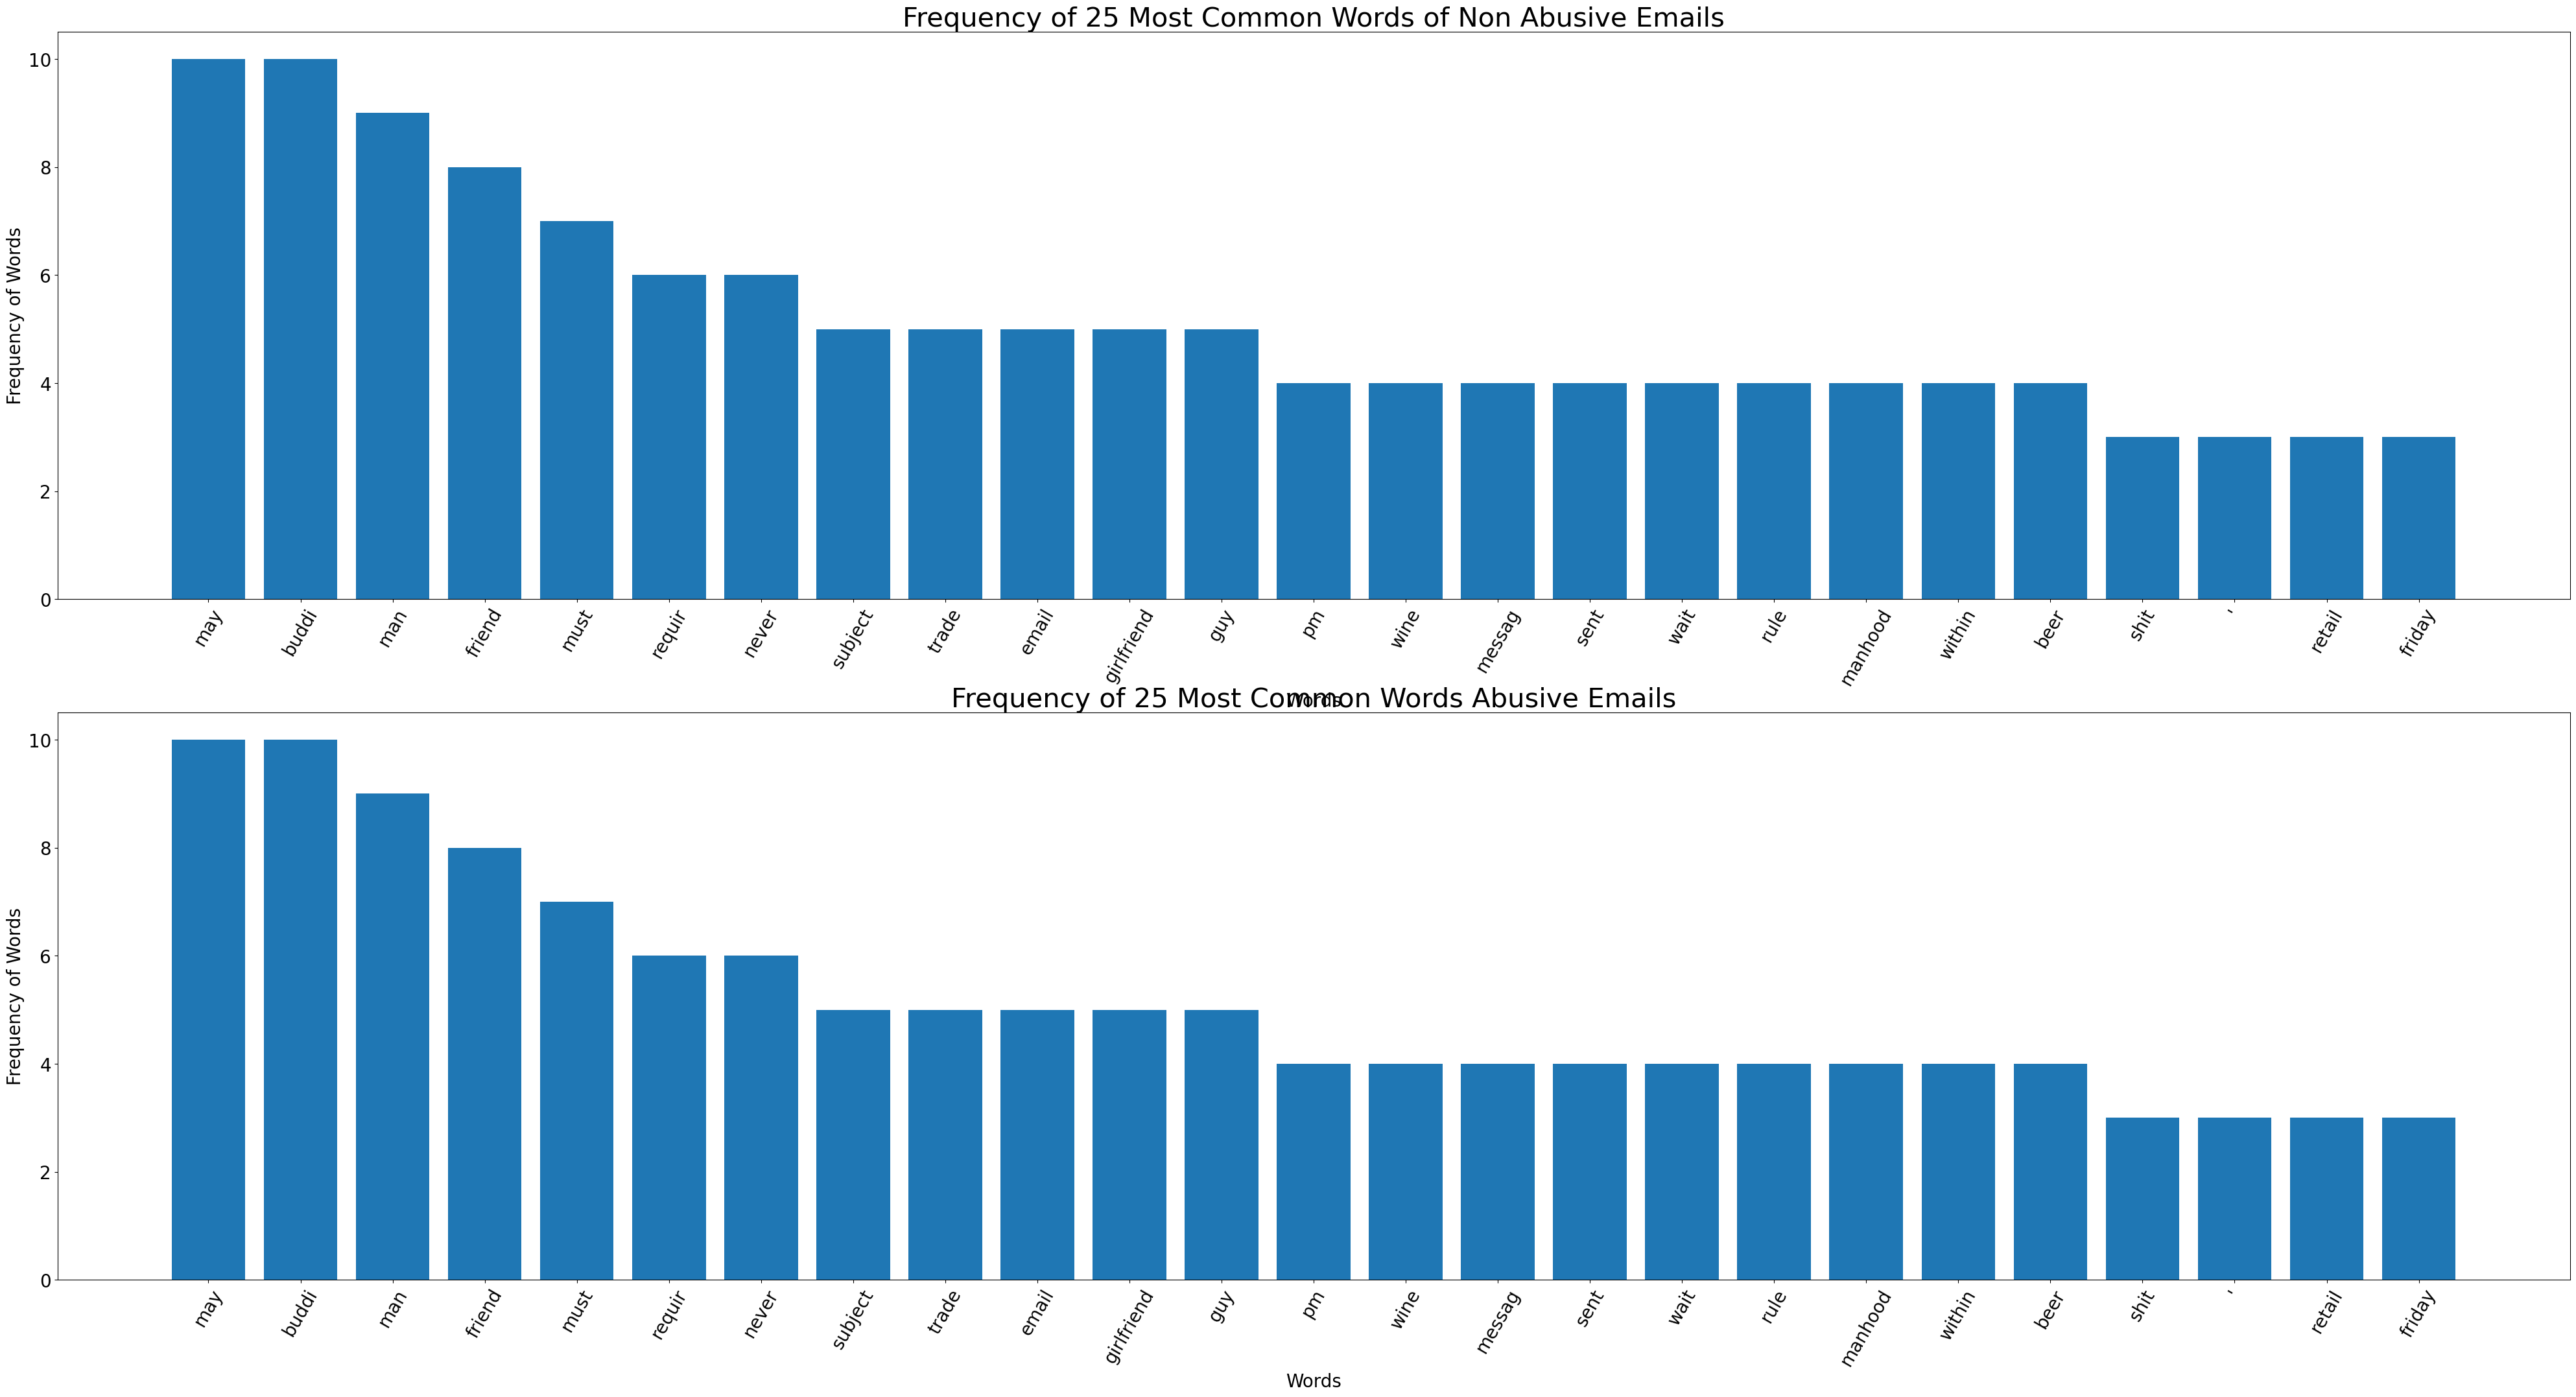

In [43]:
from nltk.probability import FreqDist
mostcommon_1 = FreqDist(nabu_toc).most_common(25)
x, y = zip(*mostcommon_1)
mostcommon_2 =FreqDist(abu_toc).most_common(25)
x1, y1 = zip(*mostcommon_2)
plt.figure(figsize=(50,25))
plt.margins(0.02)
plt.subplot(2,1,1)
plt.bar(x, y)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Frequency of Words', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=60, fontsize=20)
plt.title('Frequency of 25 Most Common Words of Non Abusive Emails', fontsize=30)
plt.subplot(2,1,2)
plt.bar(x1, y1)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Frequency of Words', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=60, fontsize=20)
plt.title('Frequency of 25 Most Common Words Abusive Emails', fontsize=30)
plt.show()

In [44]:
# Top 25 words in all the emails in our data
email_all=np.array(emails['cleaned'])
s=str(email_all)
all_toc = word_tokenize(s)
print(all_toc)

['[', "'eat", 'shit', 'john', 'j', 'lavoratoexcelr', 'pm', 'john', 'arnoldhouectect', 'cc', 'subject', 'footbal', 'bet', 'minn', 'buff', 'phil', 'indi', 'cinnci', 'det', 'clev', 'den', 'dall', 'jack', "'", "'fuck'", "'gentleman", 'follow', 'champagn', 'avail', 'approxim', 'retail', 'price', 'also', 'interest', 'trade', 'red', 'wine', 'retail', 'price', 'deriv', 'spec', 'websit', 'winesearcercom', 'wine', 'store', 'temperatur', 'control', 'privat', 'wine', 'storag', 'facil', 'quan', 'vintag', 'wine', 'retail', 'perrier', 'jouet', 'brut', 'fleur', 'de', 'champagn', 'piper', 'heidsek', 'reserv', 'dom', 'perignon', 'veuv', 'cliquot', 'ponsardin', 'la', 'grand', 'dame', 'taitteng', 'millesin', 'brut', 'jacquart', 'millesin', 'roeder', 'cristal', "interest'", '...', "'busi", 'highlight', 'weather', 'group', 'give', 'big', 'round', 'applaus', 'weather', 'team', 'environment', 'financ', 'magazin', 'rank', 'weather', 'group', 'onlin', 'servic', 'deal', 'unit', 'state', 'europ', 'gari', 'taylor'

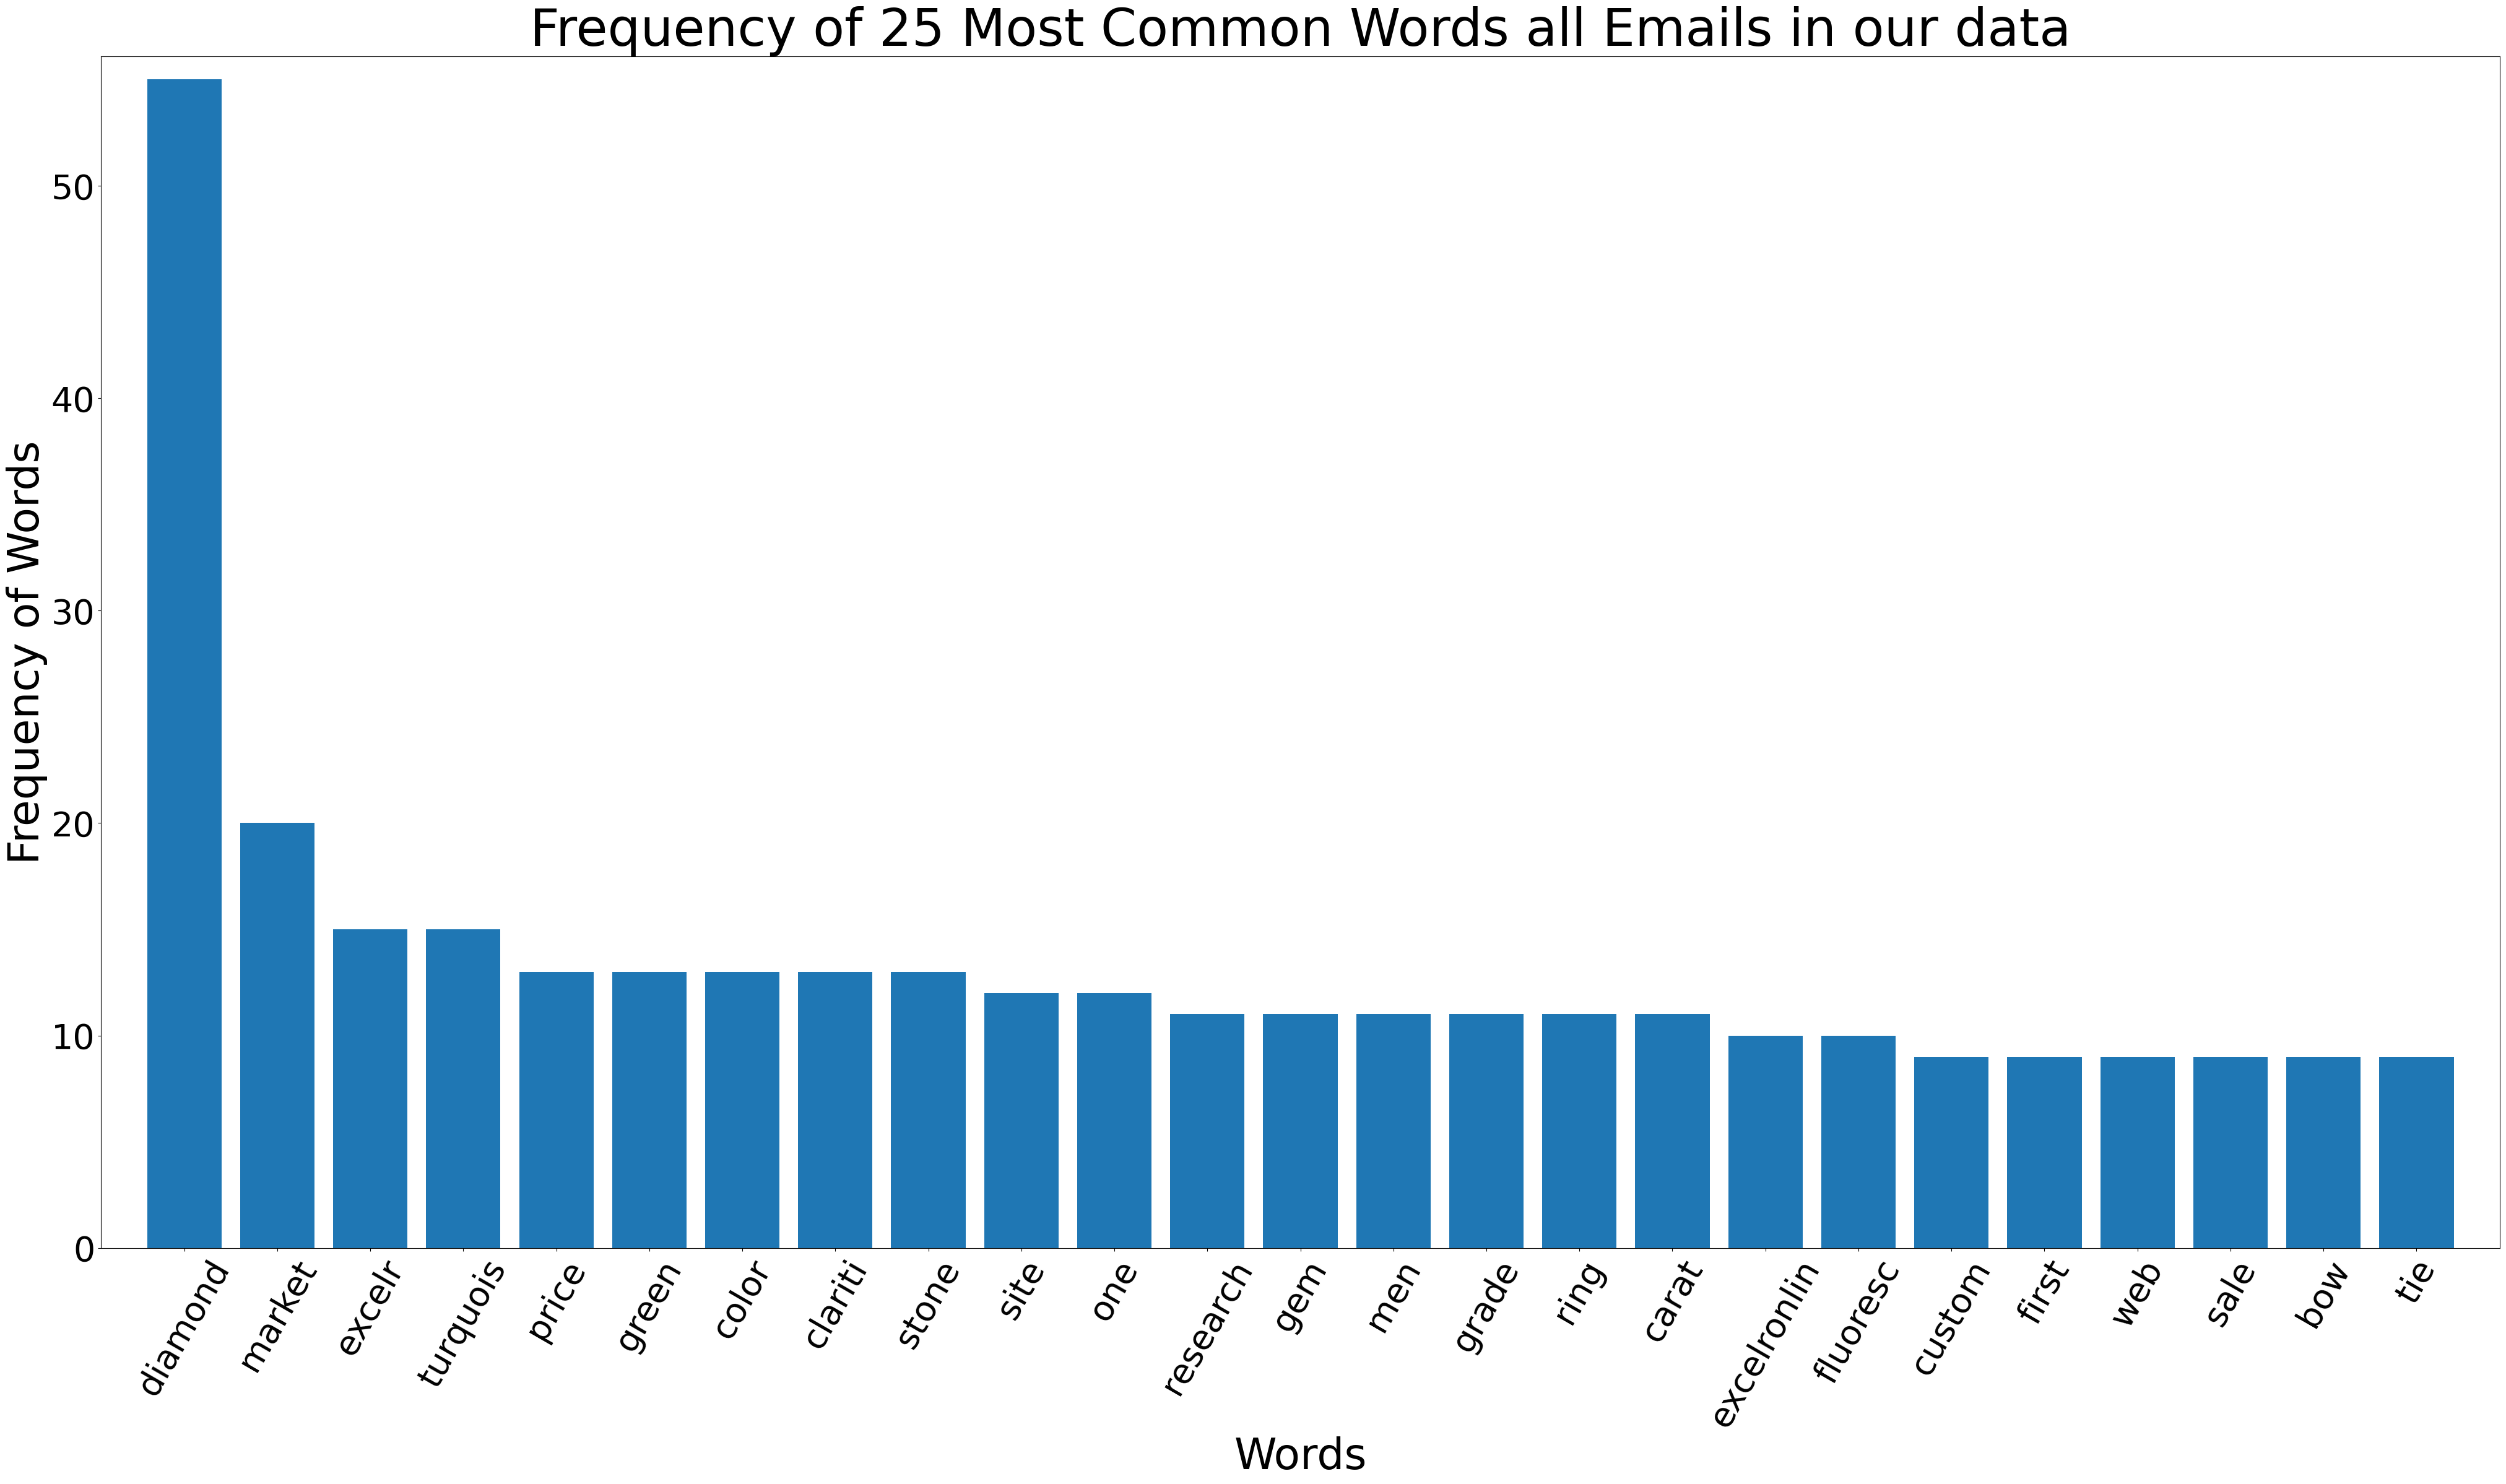

In [45]:
mostcommon_all = FreqDist(all_toc).most_common(25)
x_all, y_all = zip(*mostcommon_all)
plt.figure(figsize=(50,25))
plt.margins(0.02)
plt.bar(x_all, y_all)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words all Emails in our data', fontsize=60)
plt.show()

### Bi-Gram Chart



A bigram language model is a type of statistical language model that predicts the probability of a word in a sequence based on the previous word

In [46]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [47]:
# Top 20 Bi-gram words
top2_words = get_top_n2_words(emails["cleaned"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(20)

Bi-gram   Freq
0                    cc subject  13909
1                 origin messag  11781
2                      let know   9329
3                    would like   6215
4                     imag imag   5647
5                 north america   3730
6                    subject fw   3453
7                      plea let   3305
8                      new york   3276
9                  excelr north   3185
10          salli beckhouectect   3103
11                    last week   3079
12                   risk manag   2957
13                schedul outag   2835
14                    next week   2821
15              trans_typ final   2761
16                 america corp   2638
17                     natur ga   2620
18  communicationsexcelr commun   2605
19           mkt_type trans_dat   2582

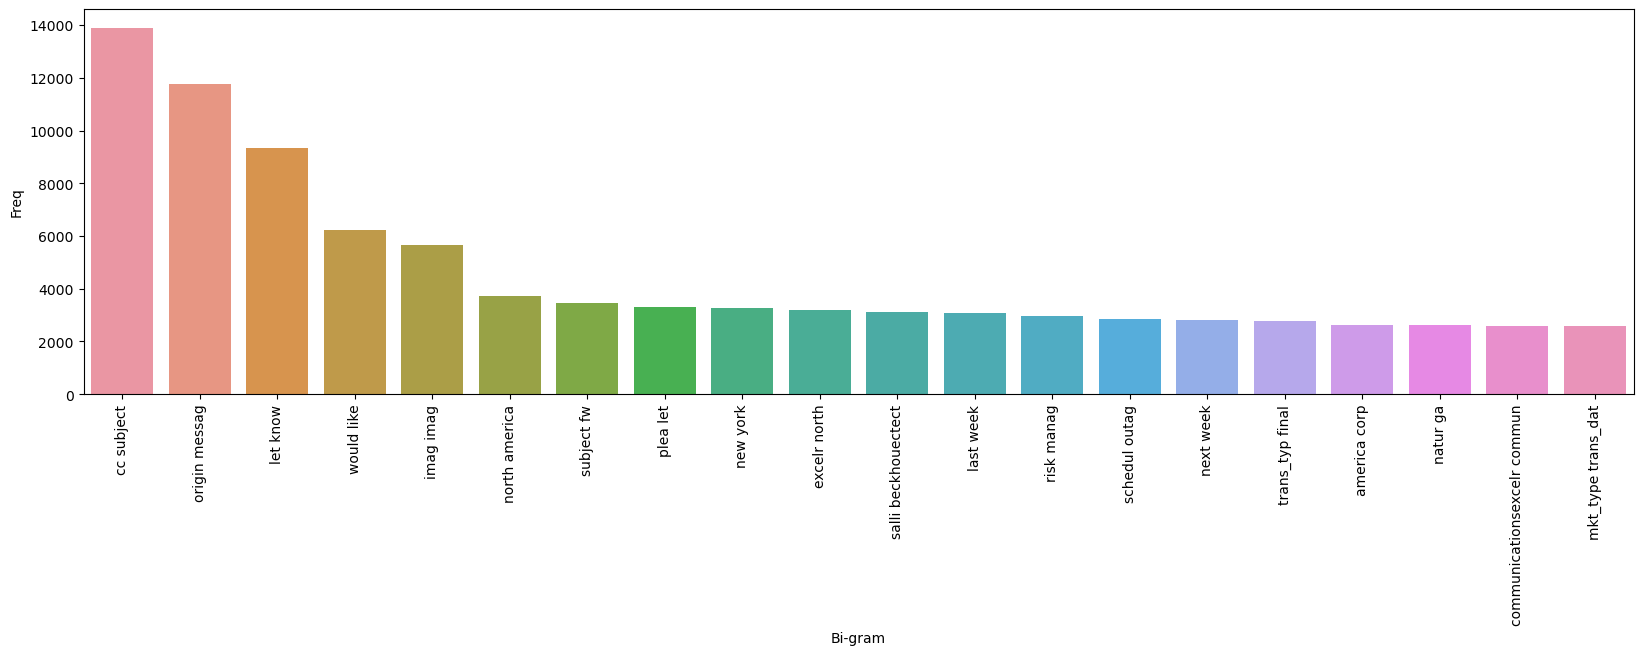

In [48]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

### Tri-Gram Chart

In [49]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [50]:
top3_words = get_top_n3_words(emails["cleaned"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [51]:
# Top 20 Tri gram words
top3_df.head(20)

Tri-gram  Freq
0                  imag imag imag  3597
1                   plea let know  3061
2            excelr north america  2937
3              north america corp  2637
4           trans_typ final sc_id  2264
5        sched_typ engi purch_sal  1897
6                final sc_id epmi  1793
7             sc_id epmi mkt_type  1793
8         epmi mkt_type trans_dat  1793
9   mkt_type trans_dat trading_sc  1793
10    pnt_of_intrc sched_typ engi  1793
11         engi purch_sal deal_no  1793
12                  hour bad data  1740
13                   bad data iso  1740
14             data iso trans_typ  1740
15            iso trans_typ final  1740
16               free agent updat  1689
17     font faceari helveticafont  1642
18          eric basshouectect cc  1611
19         purch_sal deal_no hour  1560

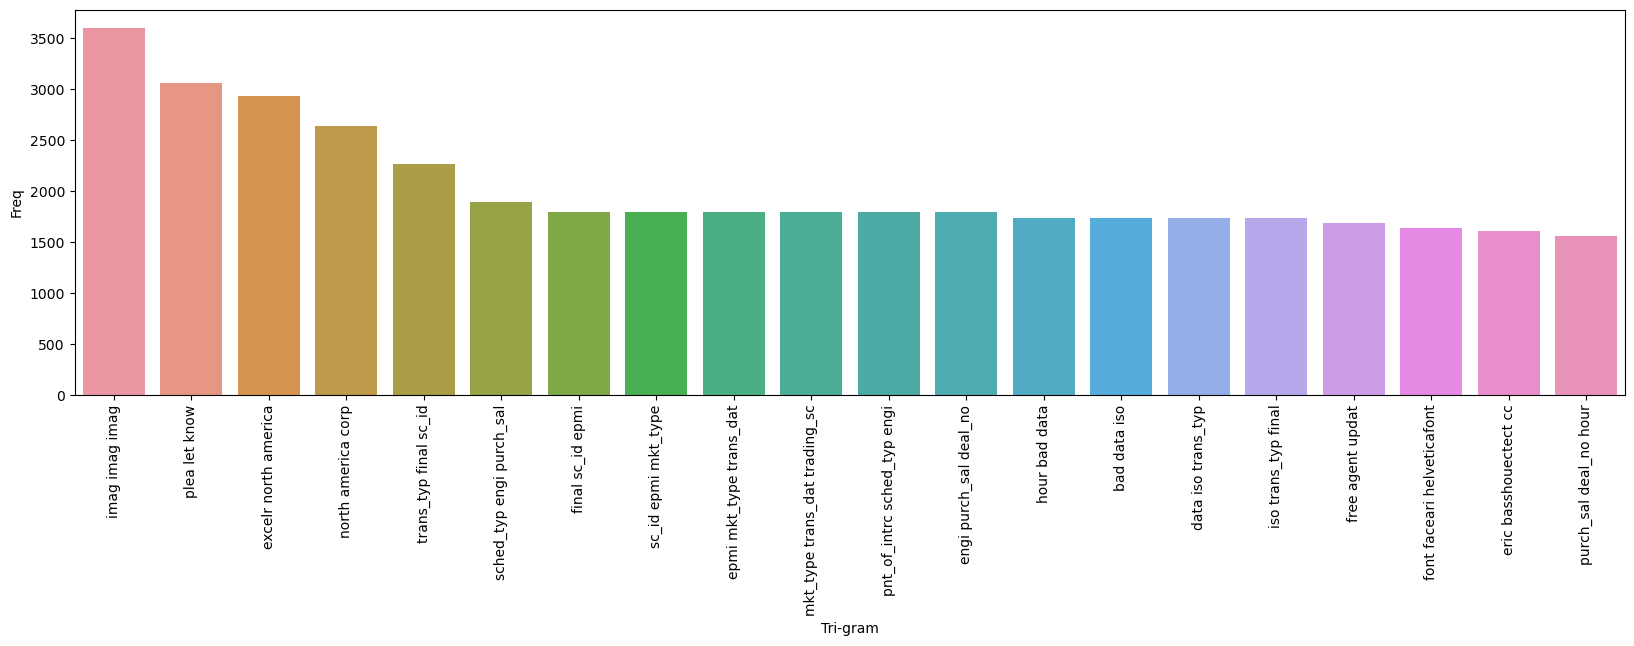

In [52]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

### Cleaned Data

In [53]:
data=emails[['cleaned','Class']]
data

cleaned  \
0      eat shit john j lavoratoexcelr   pm john arnoldhouectect cc subject footbal bet  minn  buff  phi...   
1                                                                                                     fuck   
2      gentleman follow champagn avail  approxim retail price also interest trade red wine retail price...   
3      sorri taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr commun  ...   
4      asshol john j lavoratoexcelr   john arnoldhouectect cc subject john seem make gambl problem go a...   
...                                                                                                    ...   
48071  dear market particip plea note chang plan indic oasismiscss system date shown updat revis follow...   
48072  accord fanci cipher made  month novemb figur includ buck  new york pl made  move power increment...   
48073  busi highlight weather group  give big round applaus weather team environment  financ magazin ra...   
48074  welcom diamond newslett issu  special holiday edit diamond gem fine jewelri inform resourc clien...   
48075  forward tamara jae blackhouect   pm nicki dawexcelr   pm felicia doanhouectect tamara jae blackh...   

             Class  
0          Abusive  
1          Abusive  
2          Abusive  
3          Abusive  
4          Abusive  
...            ...  
48071  Non Abusive  
48072  Non Abusive  
48073  Non Abusive  
48074  Non Abusive  
48075  Non Abusive  

[48076 rows x 2 columns]

### Removing words greater than 15 characters

In [54]:
data['unwanted']=data['cleaned'].str.findall('\w{15,}').str.join(' ')

In [55]:
data[['cleaned','unwanted']]

cleaned  \
0      eat shit john j lavoratoexcelr   pm john arnoldhouectect cc subject footbal bet  minn  buff  phi...   
1                                                                                                     fuck   
2      gentleman follow champagn avail  approxim retail price also interest trade red wine retail price...   
3      sorri taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr commun  ...   
4      asshol john j lavoratoexcelr   john arnoldhouectect cc subject john seem make gambl problem go a...   
...                                                                                                    ...   
48071  dear market particip plea note chang plan indic oasismiscss system date shown updat revis follow...   
48072  accord fanci cipher made  month novemb figur includ buck  new york pl made  move power increment...   
48073  busi highlight weather group  give big round applaus weather team environment  financ magazin ra...   
48074  welcom diamond newslett issu  special holiday edit diamond gem fine jewelri inform resourc clien...   
48075  forward tamara jae blackhouect   pm nicki dawexcelr   pm felicia doanhouectect tamara jae blackh...   

                                                                                                  unwanted  
0                                                                                          arnoldhouectect  
1                                                                                                           
2                                                                                                           
3                                                                                          arnoldhouectect  
4                                                                                          arnoldhouectect  
...                                                                                                    ...  
48071                                                                                                       
48072                                                                                                       
48073                                                                                      mcconnellpresid  
48074  httpwwwdsourcevacom httpwwwdsourcevacomdresdenhtm httpwwwdsourcevacominvestmenthtm httpwwwdsourc...  
48075                                                                      _______________________________  

[48076 rows x 2 columns]

In [56]:
data['cleaned_2']=data['cleaned'].str.split().map(lambda sl: " ".join(s for s in sl if len(s) < 15))

In [57]:
data[['cleaned','unwanted','cleaned_2']]

cleaned  \
0      eat shit john j lavoratoexcelr   pm john arnoldhouectect cc subject footbal bet  minn  buff  phi...   
1                                                                                                     fuck   
2      gentleman follow champagn avail  approxim retail price also interest trade red wine retail price...   
3      sorri taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr commun  ...   
4      asshol john j lavoratoexcelr   john arnoldhouectect cc subject john seem make gambl problem go a...   
...                                                                                                    ...   
48071  dear market particip plea note chang plan indic oasismiscss system date shown updat revis follow...   
48072  accord fanci cipher made  month novemb figur includ buck  new york pl made  move power increment...   
48073  busi highlight weather group  give big round applaus weather team environment  financ magazin ra...   
48074  welcom diamond newslett issu  special holiday edit diamond gem fine jewelri inform resourc clien...   
48075  forward tamara jae blackhouect   pm nicki dawexcelr   pm felicia doanhouectect tamara jae blackh...   

                                                                                                  unwanted  \
0                                                                                          arnoldhouectect   
1                                                                                                            
2                                                                                                            
3                                                                                          arnoldhouectect   
4                                                                                          arnoldhouectect   
...                                                                                                    ...   
48071                                                                                                        
48072                                                                                                        
48073                                                                                      mcconnellpresid   
48074  httpwwwdsourcevacom httpwwwdsourcevacomdresdenhtm httpwwwdsourcevacominvestmenthtm httpwwwdsourc...   
48075                                                                      _______________________________   

                                                                                                 cleaned_2  
0      eat shit john j lavoratoexcelr pm john cc subject footbal bet minn buff phil indi cinnci det cle...  
1                                                                                                     fuck  
2      gentleman follow champagn avail approxim retail price also interest trade red wine retail price ...  
3      sorri taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr commun j...  
4       asshol john j lavoratoexcelr john cc subject john seem make gambl problem go away bill denver jack  
...                                                                                                    ...  
48071  dear market particip plea note chang plan indic oasismiscss system date shown updat revis follow...  
48072  accord fanci cipher made month novemb figur includ buck new york pl made move power increment ne...  
48073  busi highlight weather group give big round applaus weather team environment financ magazin rank...  
48074  welcom diamond newslett issu special holiday edit diamond gem fine jewelri inform resourc client...  
48075  forward tamara jae blackhouect pm nicki dawexcelr pm felicia doanhouectect tamara jae blackhouec...  

[48076 rows x 3 columns]

We can see the words with letters>15 have been removed from the text

In [58]:
print(data.iloc[0,0])
print(data.iloc[0,-1])

eat shit john j lavoratoexcelr   pm john arnoldhouectect cc subject footbal bet  minn  buff  phil  indi  cinnci  det  clev  den  dall  jack 
eat shit john j lavoratoexcelr pm john cc subject footbal bet minn buff phil indi cinnci det clev den dall jack


### Removing some unwanted words

In [59]:
from nltk.corpus import stopwords, wordnet
sw_nltk = stopwords.words('english')

In [60]:
sw_nltk.extend(['excelr','market','diamond','lavoratoexcelr','cc subject','excelronlin','north','buddi','green','turquois','original message'
,'subject','cc','image','america','corp','let','know','beckhouectect','week','fw','today','sally','new','york','said','facerial','helveticafont',
'trans_type','final','salli', 'beckhouectect','trans_typ', 'final','communicationsexcelr', 'commun','mkt_type', 'trans_dat','eric', 'basshouectect','final','sc_id',
'wednesday','dow', 'jone','sched_typ', 'engi','purch_sal','mkt_type', 'trans_dat', 'trading_sc','imag','origin','messag','sent'])

In [61]:
data['cleaned_3'] = data['cleaned_2'].str.split().map(lambda x: [word for word in x if word not in sw_nltk])

In [62]:
data['cleaned_3']=data['cleaned_3'].apply(' '.join)
data['cleaned_3']

0                      eat shit john j pm john footbal bet minn buff phil indi cinnci det clev den dall jack
1                                                                                                       fuck
2        gentleman follow champagn avail approxim retail price also interest trade red wine retail price ...
3        sorri taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr john yea...
4                                   asshol john j john john seem make gambl problem go away bill denver jack
                                                        ...                                                 
48071    dear particip plea note chang plan indic oasismiscss system date shown updat revis follow need k...
48072    accord fanci cipher made month novemb figur includ buck pl made move power increment nepool pjm ...
48073    busi highlight weather group give big round applaus weather team environment financ magazin rank...
48074    welcom new

### Building wordcloud after removing unwanted word

In [63]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [64]:
# Joining the list into one string/text
text = ' '.join(data['cleaned_3'])

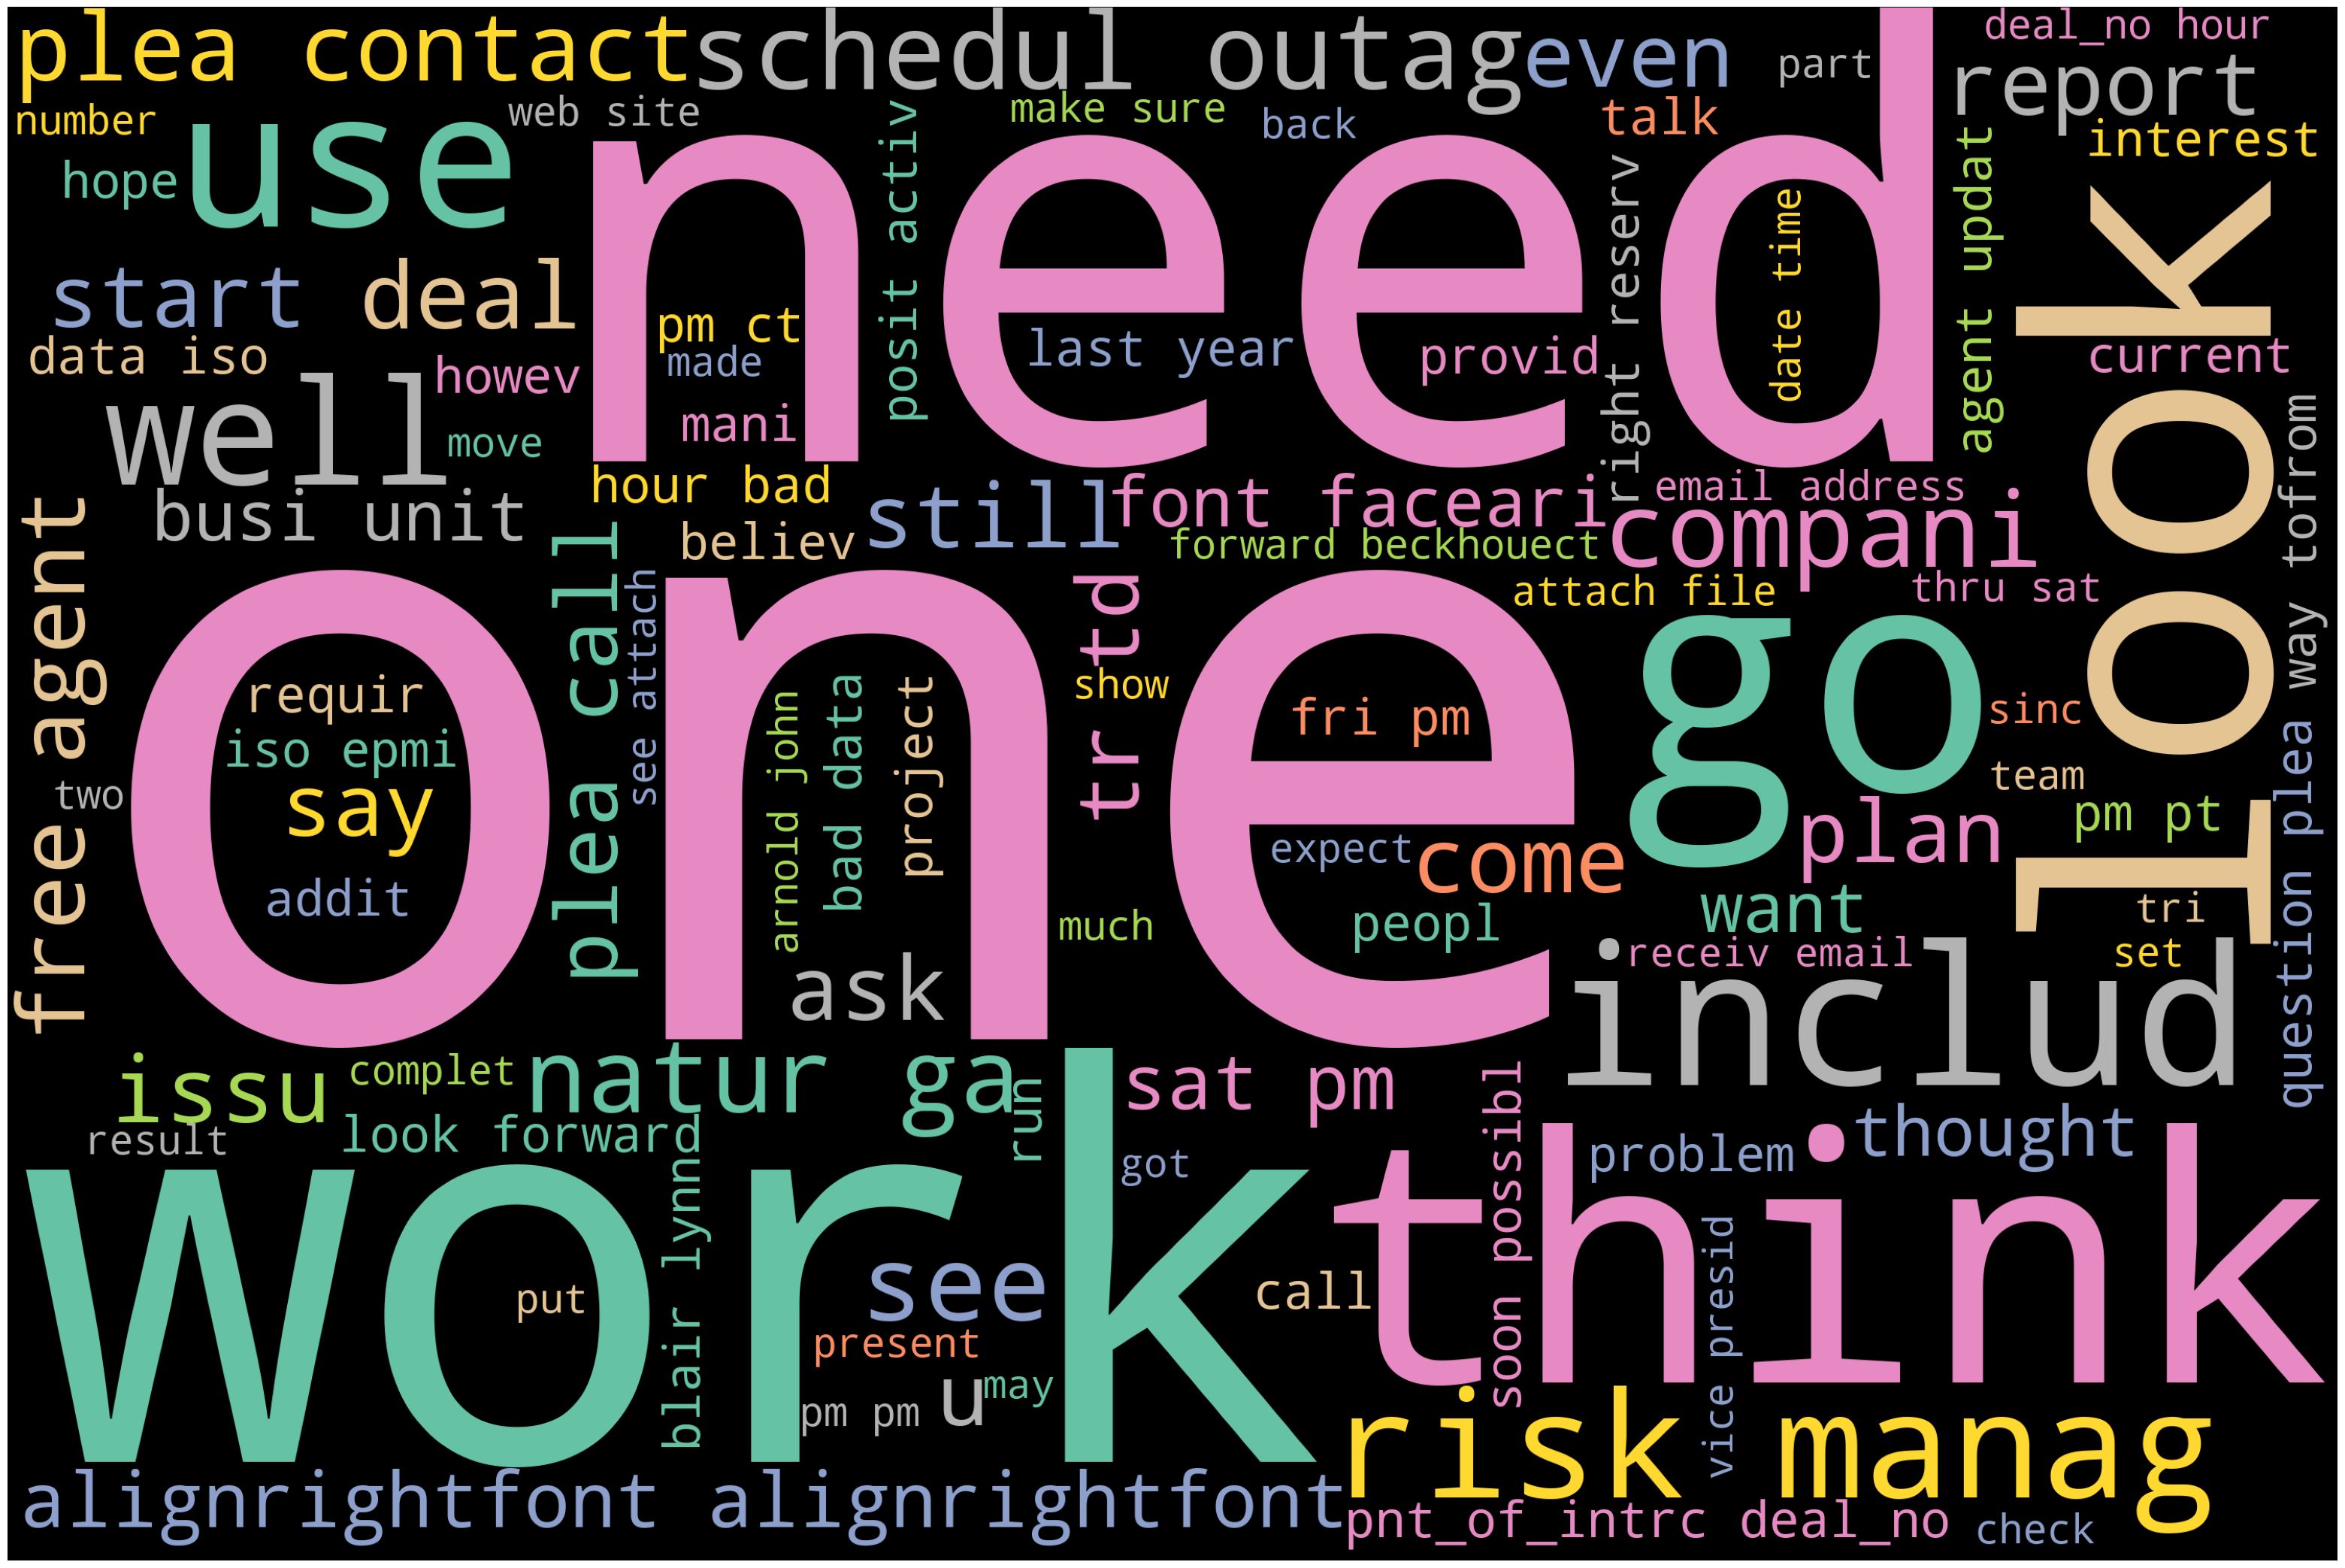

In [65]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

## BOW word_count_matrix

In [66]:
data

cleaned  \
0      eat shit john j lavoratoexcelr   pm john arnoldhouectect cc subject footbal bet  minn  buff  phi...   
1                                                                                                     fuck   
2      gentleman follow champagn avail  approxim retail price also interest trade red wine retail price...   
3      sorri taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr commun  ...   
4      asshol john j lavoratoexcelr   john arnoldhouectect cc subject john seem make gambl problem go a...   
...                                                                                                    ...   
48071  dear market particip plea note chang plan indic oasismiscss system date shown updat revis follow...   
48072  accord fanci cipher made  month novemb figur includ buck  new york pl made  move power increment...   
48073  busi highlight weather group  give big round applaus weather team environment  financ magazin ra...   
48074  welcom diamond newslett issu  special holiday edit diamond gem fine jewelri inform resourc clien...   
48075  forward tamara jae blackhouect   pm nicki dawexcelr   pm felicia doanhouectect tamara jae blackh...   

             Class  \
0          Abusive   
1          Abusive   
2          Abusive   
3          Abusive   
4          Abusive   
...            ...   
48071  Non Abusive   
48072  Non Abusive   
48073  Non Abusive   
48074  Non Abusive   
48075  Non Abusive   

                                                                                                  unwanted  \
0                                                                                          arnoldhouectect   
1                                                                                                            
2                                                                                                            
3                                                                                          arnoldhouectect   
4                                                                                          arnoldhouectect   
...                                                                                                    ...   
48071                                                                                                        
48072                                                                                                        
48073                                                                                      mcconnellpresid   
48074  httpwwwdsourcevacom httpwwwdsourcevacomdresdenhtm httpwwwdsourcevacominvestmenthtm httpwwwdsourc...   
48075                                                                      _______________________________   

                                                                                                 cleaned_2  \
0      eat shit john j lavoratoexcelr pm john cc subject footbal bet minn buff phil indi cinnci det cle...   
1                                                                                                     fuck   
2      gentleman follow champagn avail approxim retail price also interest trade red wine retail price ...   
3      sorri taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr commun j...   
4       asshol john j lavoratoexcelr john cc subject john seem make gambl problem go away bill denver jack   
...                                                                                                    ...   
48071  dear market particip plea note chang plan indic oasismiscss system date shown updat revis follow...   
48072  accord fanci cipher made month novemb figur includ buck new york pl made move power increment ne...   
48073  busi highlight weather group give big round applaus weather team environment financ magazin rank...   
48074  welcom diamond newslett issu special holiday edit diamond gem fine jewelri inform res

In [67]:
new_data= data[['cleaned_2','Class']]
new_data

cleaned_2  \
0      eat shit john j lavoratoexcelr pm john cc subject footbal bet minn buff phil indi cinnci det cle...   
1                                                                                                     fuck   
2      gentleman follow champagn avail approxim retail price also interest trade red wine retail price ...   
3      sorri taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr commun j...   
4       asshol john j lavoratoexcelr john cc subject john seem make gambl problem go away bill denver jack   
...                                                                                                    ...   
48071  dear market particip plea note chang plan indic oasismiscss system date shown updat revis follow...   
48072  accord fanci cipher made month novemb figur includ buck new york pl made move power increment ne...   
48073  busi highlight weather group give big round applaus weather team environment financ magazin rank...   
48074  welcom diamond newslett issu special holiday edit diamond gem fine jewelri inform resourc client...   
48075  forward tamara jae blackhouect pm nicki dawexcelr pm felicia doanhouectect tamara jae blackhouec...   

             Class  
0          Abusive  
1          Abusive  
2          Abusive  
3          Abusive  
4          Abusive  
...            ...  
48071  Non Abusive  
48072  Non Abusive  
48073  Non Abusive  
48074  Non Abusive  
48075  Non Abusive  

[48076 rows x 2 columns]

In [68]:
def split_into_words(i):
    return (i.split(' '))

In [69]:
# Preparing email texts into bow word count matrix format 
email_bow=CountVectorizer(analyzer=split_into_words).fit(new_data.cleaned_2)

In [70]:
# For all messages
all_emails_matrix=email_bow.transform(new_data.cleaned_2)
all_emails_matrix.shape

(48076, 75011)

## TFIDF tokenizer

In [71]:
from sklearn.feature_extraction.text import TfidfTransformer

# Learning Term weighting and normalizing on entire emails
tfidf_transformer=TfidfTransformer().fit(all_emails_matrix)

In [72]:
# Preparing TFIDF for all emails
all_emails_tfidf=tfidf_transformer.transform(all_emails_matrix)
all_emails_tfidf.shape

(48076, 75011)

## Label Encoding the class

In [73]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels

le = preprocessing.LabelEncoder()
  
new_data['Class']= le.fit_transform(new_data['Class']) 

new_data['Class'].value_counts()

1    44666
0     3410
Name: Class, dtype: int64

# Model Building

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(all_emails_tfidf,new_data['Class'],test_size=0.3,random_state=42)

In [75]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((33653, 75011), (14423, 75011), (33653,), (14423,))

## Data Balancing using SMOTE

In [76]:
# 1. Oversampling

from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)

# transform the dataset
x_train_os,y_train_os=oversample.fit_resample(x_train,y_train)

In [77]:
x_train_os.shape,y_train_os.shape

((62586, 75011), (62586,))

In [78]:
# 2. Undersampling

from imblearn.under_sampling import RandomUnderSampler
undersample=RandomUnderSampler(random_state=42)

# transform the dataset
x_train_s,y_train_s=undersample.fit_resample(x_train_os,y_train_os)

In [79]:
x_train_s.shape,y_train_s.shape

((62586, 75011), (62586,))

# 1. Multinomial Naive Bayes Classifier Algorithm

In [80]:
from sklearn.naive_bayes import MultinomialNB as MB
classifier_mnb=MB()
model_mnb=classifier_mnb.fit(x_train_s,y_train_s)

train_pred_mnb=model_mnb.predict(x_train_s)
accuracy_train_mnb=np.mean(train_pred_mnb==y_train_s)
print('accuracy_train_mnb:',accuracy_train_mnb)

test_pred_mnb=model_mnb.predict(x_test)
accuracy_test_mnb=np.mean(test_pred_mnb==y_test)
print('accuracy_test_mnb:',accuracy_test_mnb)

accuracy_train_mnb: 0.9679481034097083
accuracy_test_mnb: 0.9477223878527352


In [81]:
from sklearn.metrics import classification_report

# print classification report
print(classification_report(y_test,test_pred_mnb))

              precision    recall  f1-score   support

           0       0.59      0.93      0.72      1050
           1       0.99      0.95      0.97     13373

    accuracy                           0.95     14423
   macro avg       0.79      0.94      0.85     14423
weighted avg       0.96      0.95      0.95     14423



# 2. Logistic Regression Classifier Algorithm

In [82]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

model_log=log.fit(x_train_s,y_train_s)

train_pred_log=model_log.predict(x_train_s)
accuracy_train_log=np.mean(train_pred_log==y_train_s)
print('accuracy_train_log:',accuracy_train_log)

test_pred_log=model_log.predict(x_test)
accuracy_test_log=np.mean(test_pred_log==y_test)
print('accuracy_test_log:',accuracy_test_log)

accuracy_train_log: 0.9957818042373694
accuracy_test_log: 0.9865492615960618


In [83]:
from sklearn.metrics import classification_report

# print classification report
print(classification_report(y_test,test_pred_log))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1050
           1       1.00      0.99      0.99     13373

    accuracy                           0.99     14423
   macro avg       0.94      0.97      0.95     14423
weighted avg       0.99      0.99      0.99     14423



# 3. Decision Tree Classsifer

In [84]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

model_dtc=model_gini.fit(x_train_s,y_train_s)
train_pred_dtc=model_dtc.predict(x_train_s)
accuracy_train_dtc=np.mean(train_pred_dtc==y_train_s)
print('accuracy_train_dtc:',accuracy_train_dtc)

test_pred_dtc=model_dtc.predict(x_test)
accuracy_test_dtc=np.mean(test_pred_dtc==y_test)
print('accuracy_test_dtc:',accuracy_test_dtc)

accuracy_train_dtc: 0.6800881986386732
accuracy_test_dtc: 0.469597171184913


In [85]:
from sklearn.metrics import classification_report

# print classification report
print(classification_report(y_test,test_pred_dtc))

              precision    recall  f1-score   support

           0       0.12      0.95      0.21      1050
           1       0.99      0.43      0.60     13373

    accuracy                           0.47     14423
   macro avg       0.55      0.69      0.40     14423
weighted avg       0.93      0.47      0.57     14423



# 4. Random Forest Classsifer

In [86]:
from sklearn.ensemble import RandomForestClassifier
num_trees=55 # default max trees=100
model=RandomForestClassifier(n_estimators=num_trees,max_features=2,random_state=0)

model_rfc=model.fit(x_train_s,y_train_s)
train_pred_rfc=model_rfc.predict(x_train_s)
accuracy_train_rfc=np.mean(train_pred_rfc==y_train_s)
print('accuracy_train_rfc:',accuracy_train_rfc)

test_pred_rfc=model_rfc.predict(x_test)
accuracy_test_rfc=np.mean(test_pred_rfc==y_test)
print('accuracy_test_rfc:',accuracy_test_rfc)

accuracy_train_rfc: 0.9999840219857477
accuracy_test_rfc: 0.9871732649240796


In [87]:
from sklearn.metrics import classification_report

# print classification report
print(classification_report(y_test,test_pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      1050
           1       0.99      1.00      0.99     13373

    accuracy                           0.99     14423
   macro avg       0.99      0.92      0.95     14423
weighted avg       0.99      0.99      0.99     14423



 # 5. Support Vector Machines Classifier Algorithm

In [88]:
from sklearn.svm import SVC

In [89]:
SVM = SVC(C=1.0, kernel='linear', degree=3 , gamma='auto')

In [90]:
model_svm=SVM.fit(x_train_s,y_train_s)

In [91]:
train_pred_svm=model_svm.predict(x_train_s)
accuracy_train_svm=np.mean(train_pred_svm==y_train_s)
print('accuracy_train_svm:',accuracy_train_svm)

accuracy_train_svm: 0.9989933851020996


In [92]:
test_pred_svm=model_svm.predict(x_test)
accuracy_test_svm=np.mean(test_pred_svm==y_test)
print('accuracy_test_svm:',accuracy_test_svm)

accuracy_test_svm: 0.9913332871108645


In [93]:
from sklearn.metrics import classification_report

# print classification report
print(classification_report(y_test,test_pred_svm))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1050
           1       1.00      1.00      1.00     13373

    accuracy                           0.99     14423
   macro avg       0.97      0.97      0.97     14423
weighted avg       0.99      0.99      0.99     14423



In [94]:
acc={'Model':pd.Series(['Multinomial_NBC','SVM_SVC','Logistic_Reg_C','Decision_Tree_C','Random_Forest_C']),
    'Train Accuracy' : pd.Series([accuracy_train_mnb,accuracy_train_svm,accuracy_train_log,accuracy_train_dtc,accuracy_train_rfc]),
    'Test Accuracy':pd.Series([accuracy_test_mnb,accuracy_test_svm,accuracy_test_log,accuracy_test_dtc,accuracy_test_rfc])}
accuracy_table=pd.DataFrame(acc)
accuracy_table.sort_values('Test Accuracy',ascending=False).reset_index(drop=True)

Model  Train Accuracy  Test Accuracy
0          SVM_SVC        0.998993       0.991333
1  Random_Forest_C        0.999984       0.987173
2   Logistic_Reg_C        0.995782       0.986549
3  Multinomial_NBC        0.967948       0.947722
4  Decision_Tree_C        0.680088       0.469597

 # Deployment

In [95]:
import streamlit as st